In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


# read data

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/data/UNSW_NB15_freq_scaled.csv')
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,-0.188346,0.477508,0.548451,0.4547,-0.101342,-0.129612,-0.047849,-0.097232,-0.568650,0.702512,...,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,-0.120335,0.360923,0
1,-0.099897,0.477508,0.548451,0.4547,-0.042496,0.173998,-0.045110,0.188966,-0.568623,-1.151363,...,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.287000,-0.120335,0.360923,0
2,0.063006,0.477508,0.548451,0.4547,-0.086630,-0.022456,-0.047239,-0.008217,-0.569024,-1.151363,...,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.571689,-0.287000,-0.120335,0.360923,0
3,0.072800,0.477508,0.019327,0.4547,-0.057207,-0.058174,-0.045720,-0.093142,-0.569027,-1.151363,...,-0.520051,-0.478652,8.503550,8.479151,-0.193597,-0.571689,-0.746782,-0.120335,0.360923,0
4,-0.133449,0.477508,0.548451,0.4547,-0.071919,-0.111753,-0.046261,-0.096576,-0.568904,0.722026,...,-0.520051,2.848467,-0.110419,-0.110372,-0.193597,-0.571689,2.747558,-0.120335,0.360923,0


## causal discovery

In [ ]:
!pip install lingam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 5.7 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=51451e606912ddcffeae30f2f32444840bcad559144d75ee1f9d4b1d9689e0ca
  Stored in directory: /root/.cache/pip/wheels/d2/9a/31/fae291ff6a649bad125037eef8c7cc63d8c542e14bdcccea37
Successfully built semopy


### index mappings

In [ ]:
df_list = df.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

44
{'dur': 0, 'proto': 1, 'service': 2, 'state': 3, 'spkts': 4, 'dpkts': 5, 'sbytes': 6, 'dbytes': 7, 'rate': 8, 'sttl': 9, 'dttl': 10, 'sload': 11, 'dload': 12, 'sloss': 13, 'dloss': 14, 'sinpkt': 15, 'dinpkt': 16, 'sjit': 17, 'djit': 18, 'swin': 19, 'stcpb': 20, 'dtcpb': 21, 'dwin': 22, 'tcprtt': 23, 'synack': 24, 'ackdat': 25, 'smean': 26, 'dmean': 27, 'trans_depth': 28, 'response_body_len': 29, 'ct_srv_src': 30, 'ct_state_ttl': 31, 'ct_dst_ltm': 32, 'ct_src_dport_ltm': 33, 'ct_dst_sport_ltm': 34, 'ct_dst_src_ltm': 35, 'is_ftp_login': 36, 'ct_ftp_cmd': 37, 'ct_flw_http_mthd': 38, 'ct_src_ltm': 39, 'ct_srv_dst': 40, 'is_sm_ips_ports': 41, 'attack_cat': 42, 'label': 43}


### setting prior knowledge

In [ ]:
from lingam.utils import make_prior_knowledge

prior_knowledge = make_prior_knowledge(
    44,
    sink_variables = [df_dict['attack_cat'], df_dict["label"]],
)


### direct lingam

In [ ]:
import lingam
from lingam import DirectLiNGAM
from lingam.utils import make_dot

model = DirectLiNGAM(
                    random_state=42,
                    measure = 'pwling',
                    prior_knowledge = prior_knowledge
                    )

model.fit(df)
print("Causal ordering:", model.causal_order_)

KeyboardInterrupt: 

#### gpu

In [ ]:
!pip -q install cupy-cuda12x  # pick the right CUDA build for your runtime
!pip -q install git+https://github.com/aknvictor/culingam.git
!pip -q install joblib tqdm

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import lingam
from culingam.directlingam import DirectLiNGAM as CuLiNGAM
from lingam.utils import make_dot
import matplotlib.pyplot as plt

# ==== 1. Initialize CuLiNGAM ====
model = CuLiNGAM(
    random_state=42,
    measure='pwling',          # Pairwise LiNGAM measure
    prior_knowledge=prior_knowledge  # Optional: matrix with constraints
)

# ==== 2. Fit the model ====
model.fit(df)

# ==== 3. Results ====
print("Causal ordering:", model.causal_order_)
print("\nAdjacency matrix:\n", model.adjacency_matrix_)

# ==== 4. Visualization ====
dot = make_dot(model.adjacency_matrix_, labels=list(df.columns))
dot.format = 'png'
dot.render("/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_graph", cleanup=True)
dot.view()

print("\nGraph saved as 'culingam_graph.png'")

# ==== 5. Plot adjacency heatmap ====
plt.figure(figsize=(10, 8))
plt.imshow(model.adjacency_matrix_, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Causal Strength')
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.title("CuLiNGAM Adjacency Matrix")
plt.tight_layout()
plt.show()

  0%|          | 0/44 [00:00<?, ?it/s]

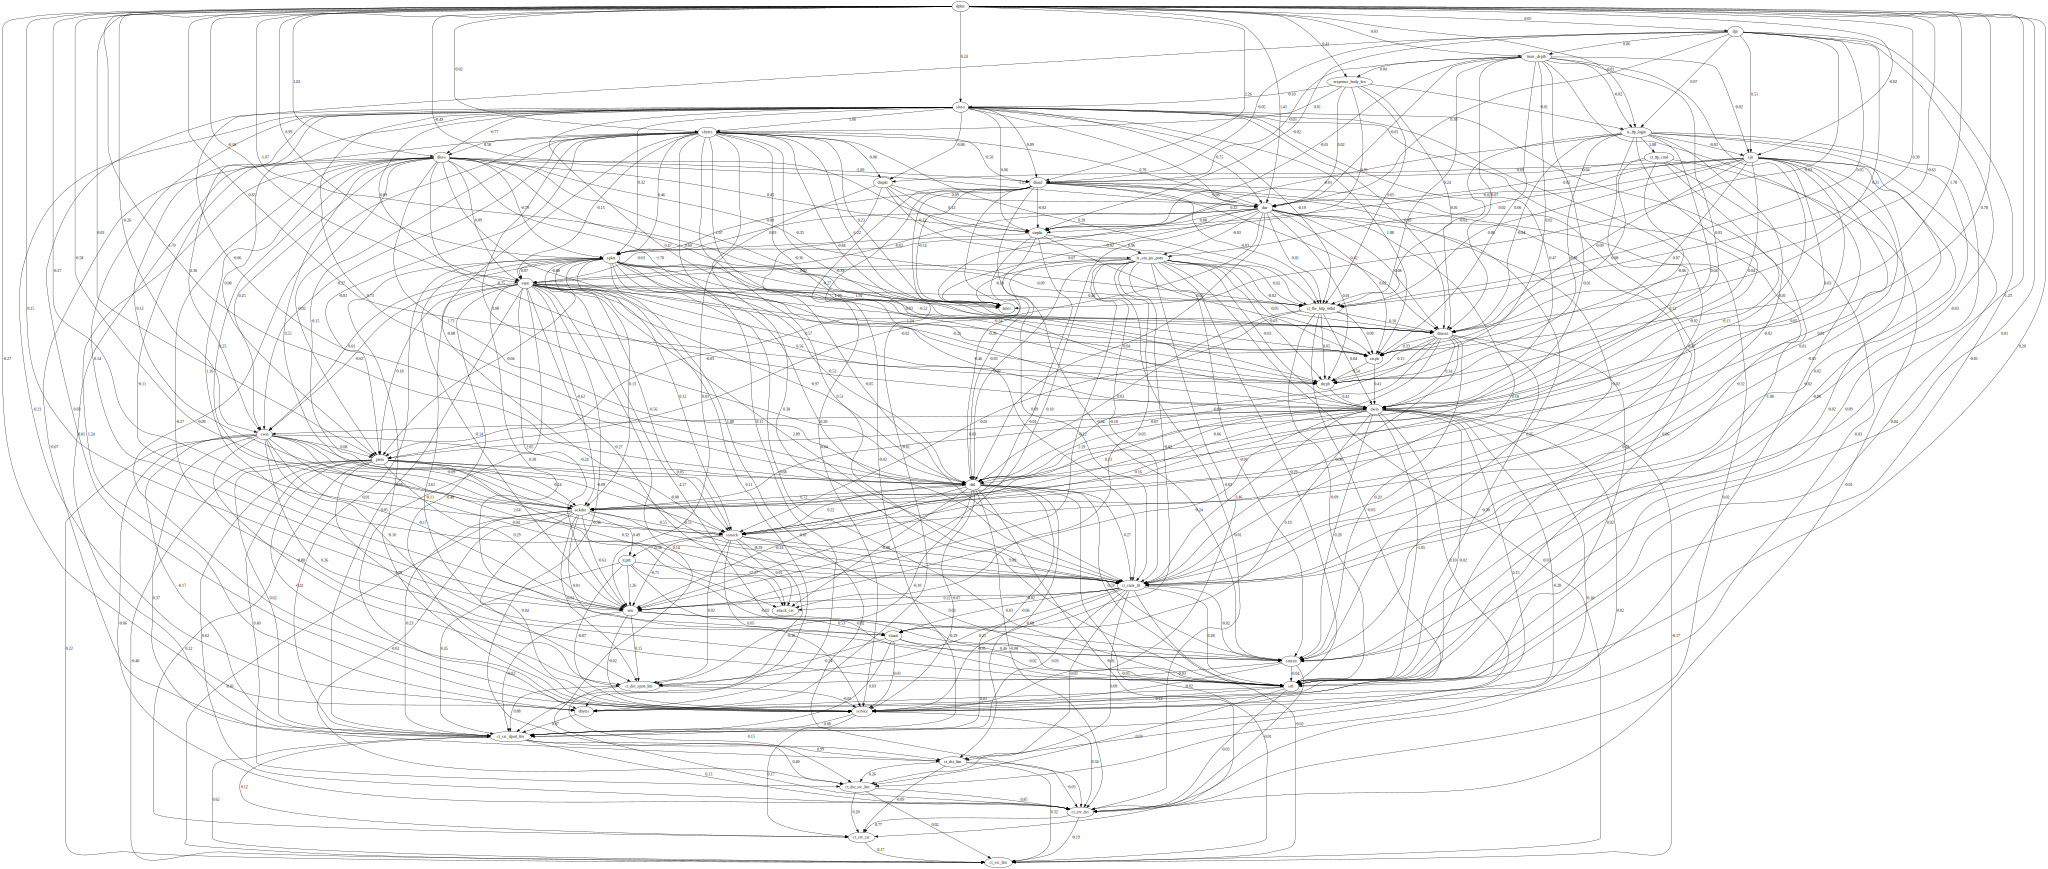

In [ ]:
make_dot(model.adjacency_matrix_, labels=list(df.columns))

#### saving adjaccency matrix

In [ ]:
import numpy as np
import pandas as pd

# Convert to DataFrame with column/row labels
adj_df = pd.DataFrame(
    model.adjacency_matrix_,
    index=df.columns,
    columns=df.columns
)

# Save to CSV
adj_df.to_csv("/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu.csv")

# Save as NumPy binary (faster for loading in Python later)
np.save("culingam_adjacency_matrix.npy", model.adjacency_matrix_)

print("\nAdjacency matrix saved as:")
print(" - culingam_adjacency_matrix.csv (human-readable)")
print(" - culingam_adjacency_matrix.npy (fast Python load)")


Adjacency matrix saved as:
 - culingam_adjacency_matrix.csv (human-readable)
 - culingam_adjacency_matrix.npy (fast Python load)


#### save order

#### subgraph

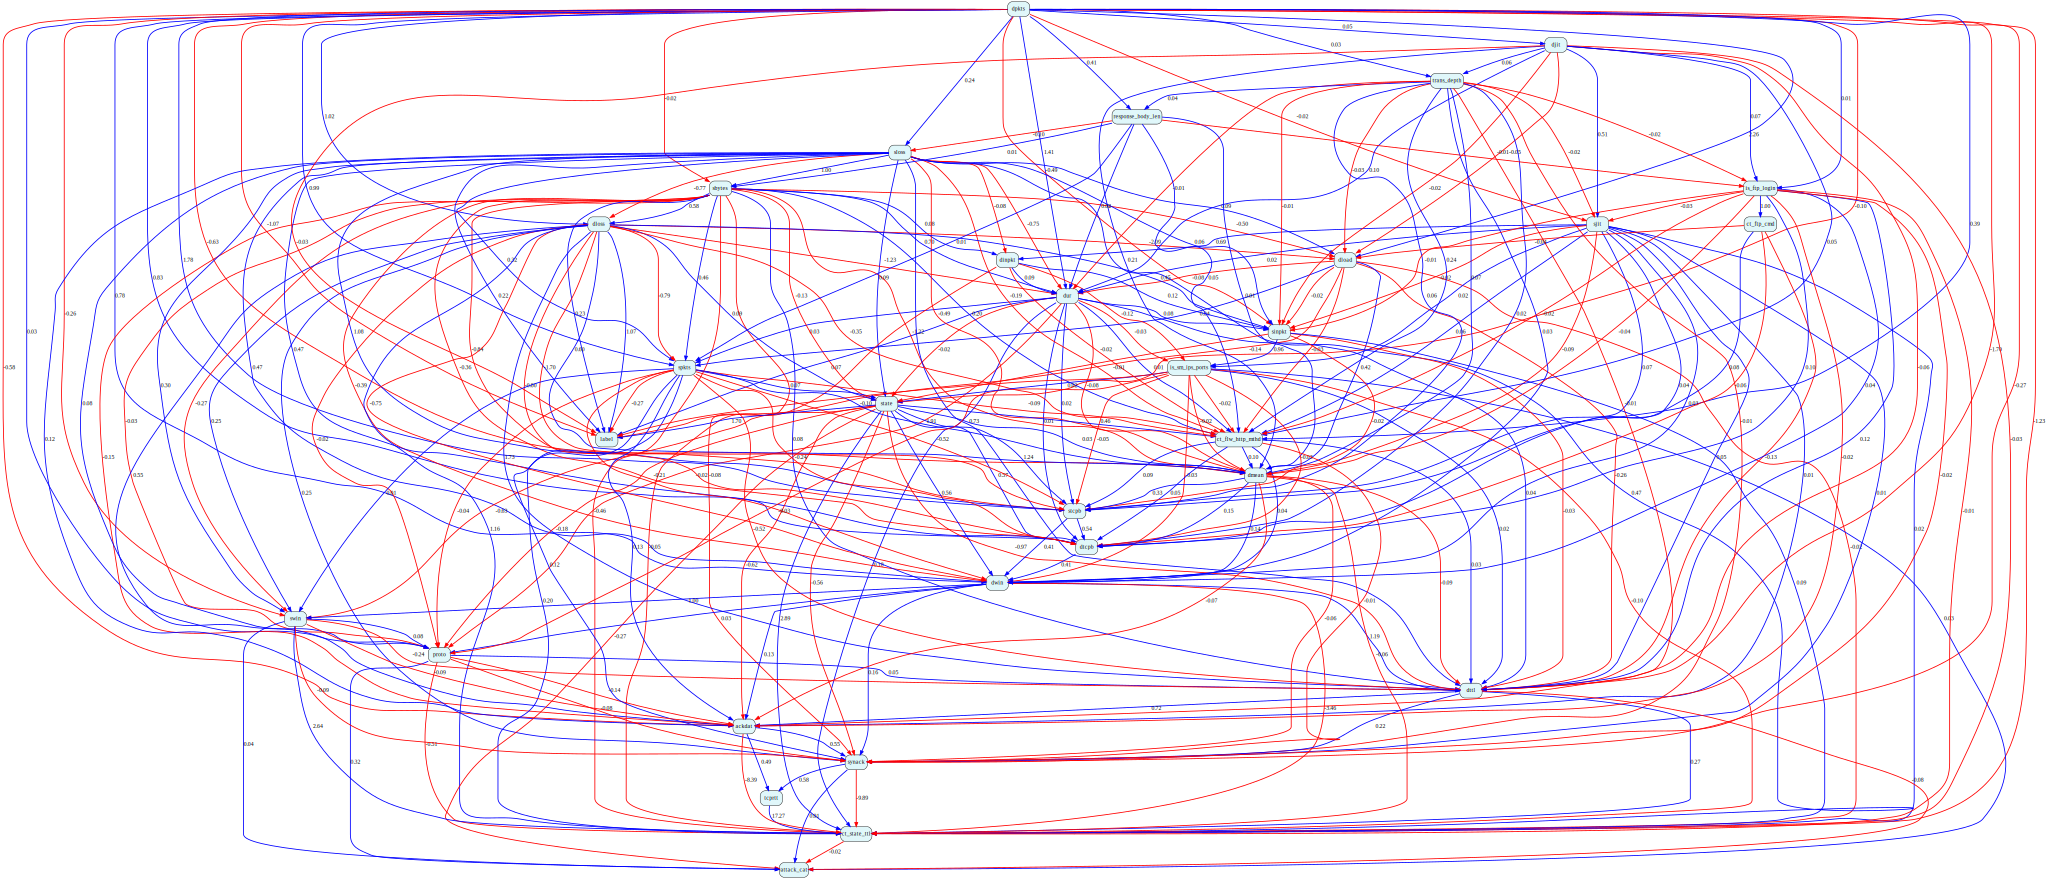

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import graphviz

def make_filtered_dot_graph(adjacency_matrix, labels, target_nodes, lower_limit=0.00000):
    """
    Creates a filtered causal graph, showing only the causal ancestors of target nodes.

    Args:
        adjacency_matrix (np.ndarray): The adjacency matrix from a LiNGAM model.
        labels (list): A list of column names corresponding to the matrix.
        target_nodes (list): A list of column names to serve as the target for filtering.
        lower_limit (float, optional): Edges with an absolute weight below this limit are pruned. Defaults to 0.0.

    Returns:
        graphviz.Digraph: A Graphviz object representing the filtered graph.
    """
    # Create a NetworkX directed graph from the adjacency matrix
    G = nx.DiGraph()
    for i, col_i in enumerate(labels):
        G.add_node(col_i)
        for j, col_j in enumerate(labels):
            weight = adjacency_matrix[i, j]
            # Add an edge if the weight is above the specified lower limit
            if abs(weight) > lower_limit:
                G.add_edge(col_j, col_i, weight=weight) # Note: LiNGAM matrix is B_ij for i<-j

    # Find all ancestors (causal parents) of the target nodes
    ancestors = set()
    for node in target_nodes:
        if node in G:
            ancestors.update(nx.ancestors(G, node))
            ancestors.add(node) # Include the target node itself

    # Create a new subgraph containing only the target nodes and their ancestors
    subgraph = G.subgraph(ancestors)

    # Create the Graphviz visualization
    dot = graphviz.Digraph(comment='Filtered Causal Graph', engine='dot')
    dot.attr('node', shape='box', style='rounded,filled', fillcolor='#E0F7FA')
    dot.attr('edge', color='black', arrowhead='normal')

    for node in subgraph.nodes():
        dot.node(node, node)

    for u, v, data in subgraph.edges(data=True):
        weight = data['weight']
        color = 'red' if weight < 0 else 'blue'
        label = f"{weight:.2f}"
        dot.edge(u, v, label=label, color=color, penwidth='2')

    return dot

# --- Example Usage with Dummy Data ---
# Let's assume you have an adjacency matrix and labels from your LiNGAM model.
# NOTE: Replace this section with your actual model output.

# Dummy data for demonstration purposes
labels = df.columns.tolist()
adj_matrix = model.adjacency_matrix_

# Use the function to draw the filtered graph
target_nodes = ['label', 'attack_cat']
LOWER_LIMIT = 0.01
filtered_graph = make_filtered_dot_graph(adj_matrix, labels, target_nodes, lower_limit=LOWER_LIMIT)

# To display the graph in a Jupyter Notebook, just run this line:
filtered_graph.render(f"/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_filtered_graph_{LOWER_LIMIT}", format='png', cleanup=True)
filtered_graph


In [ ]:
# Assuming 'model' is your LiNGAM model and 'df' is your DataFrame
causal_effects_matrix = model.adjacency_matrix_
feature_names = list(df.columns)

target_index = feature_names.index('attack_cat')
causal_effects_on_target = causal_effects_matrix[target_index]

# Use a pandas Series to combine the values with the feature names
causal_effects_series = pd.Series(causal_effects_on_target, index=feature_names)

print("Direct Causal Effects on attack_cat:")
print(causal_effects_series.sort_values())

Direct Causal Effects on attack_cat:
state               -0.273216
dttl                -0.079041
ct_state_ttl        -0.019468
sttl                -0.009924
dmean               -0.003224
dur                 -0.002518
sloss               -0.001560
dpkts               -0.000795
sload                0.000000
dbytes               0.000000
spkts                0.000000
rate                 0.000000
dloss                0.000000
dload                0.000000
sbytes               0.000000
service              0.000000
response_body_len    0.000000
sinpkt               0.000000
sjit                 0.000000
djit                 0.000000
dwin                 0.000000
tcprtt               0.000000
dtcpb                0.000000
stcpb                0.000000
trans_depth          0.000000
ct_srv_src           0.000000
smean                0.000000
is_ftp_login         0.000000
ct_dst_src_ltm       0.000000
ct_dst_sport_ltm     0.000000
ct_src_dport_ltm     0.000000
ct_dst_ltm           0.000000
ct_

In [ ]:
# Assuming 'model' is your LiNGAM model and 'df' is your DataFrame
causal_effects_matrix = model.adjacency_matrix_
feature_names = list(df.columns)

target_index = feature_names.index('label')
causal_effects_on_target = causal_effects_matrix[target_index]

# Use a pandas Series to combine the values with the feature names
causal_effects_series = pd.Series(causal_effects_on_target, index=feature_names)

print("Direct Causal Effects on label:")
print(causal_effects_series.sort_values())

Direct Causal Effects on label:
dpkts               -1.070584
spkts               -0.267513
dload               -0.140187
is_sm_ips_ports     -0.097971
djit                -0.034973
trans_depth         -0.009477
dinpkt              -0.008815
ct_ftp_cmd          -0.005982
response_body_len   -0.004327
sinpkt               0.000000
sload                0.000000
stcpb                0.000000
dbytes               0.000000
dttl                 0.000000
sttl                 0.000000
proto                0.000000
tcprtt               0.000000
dwin                 0.000000
synack               0.000000
ackdat               0.000000
dmean                0.000000
dtcpb                0.000000
sjit                 0.000000
swin                 0.000000
ct_srv_src           0.000000
smean                0.000000
ct_state_ttl         0.000000
ct_dst_src_ltm       0.000000
ct_dst_ltm           0.000000
ct_dst_sport_ltm     0.000000
rate                 0.000000
service              0.000000
ct_src_l

### bootstrapping

What bootstrap Does
The purpose of the bootstrap method is not to analyze the relationship between your features and the label or attack_cat columns. Instead, it assesses the statistical reliability of the causal relationships it finds among the features themselves.

Here’s a breakdown of the process:

Resampling: The method creates n_sampling (in your case, 200) new datasets by randomly sampling with replacement from your original df_f DataFrame.

Repeated Fitting: It runs the DirectLiNGAM algorithm on each of these 200 new datasets.

Result Aggregation: It then aggregates the results, providing you with a measure of how often each causal link (e.g., bytes_in -> num_pkts_in) was found across all 200 runs. This helps you determine which causal links are strong and stable versus those that might be a fluke of your specific dataset.



In [ ]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [ ]:
result=model.bootstrap(df, n_sampling=200)

TypeError: resample() missing 1 required positional argument: 'y'

In [ ]:
# Assuming 'model' is your LiNGAM model instance and 'df' is your full DataFrame.

# 1. Separate the features from the labels
df_f = df.drop(columns=['label', 'attack_cat'])

# 2. Run the bootstrap method on the features-only DataFrame
# This will resample the feature data to evaluate the stability of your causal graph
result = model.bootstrap(df_f, n_sampling=200)

print(result)

TypeError: resample() missing 1 required positional argument: 'y'

#### passing the model to cpu bc there is an error in gpu as can be seen in the previous code blocks

In [ ]:
import numpy as np
import pandas as pd
adj = pd.read_csv("/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu.csv", index_col=0).to_numpy()
adj

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.01837763,  0.        ,  0.        , ..., -0.02755696,
         0.        ,  0.        ],
       [-0.00811519, -0.41277224,  0.        , ...,  0.03329768,
         0.        ,  0.        ],
       ...,
       [-0.0295086 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00251812,  0.31803454,  0.        , ...,  0.02728017,
         0.        ,  0.        ],
       [ 0.06678489,  0.        ,  0.        , ..., -0.09797068,
         0.        ,  0.        ]])

In [ ]:
import numpy as np
import pandas as pd
from lingam import DirectLiNGAM

# Step 1: Simulate the results from your culingam model
# NOTE: Replace these with the actual results from your culingam model.
# The adjacency matrix (B) and the causal order are the two key outputs.
# The rows and columns of the matrix correspond to the causal order.
# The (i, j) element of B represents the causal effect from variable j to variable i.
feature_cols = df.columns
#culingam_adjacency_matrix = model.adjacency_matrix_
culingam_adjacency_matrix = pd.read_csv("/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu.csv", index_col=0).to_numpy()

# The causal order is the ordering of variables determined by the model.
# This should be the index positions of the variables in your original features.
# For example, if 'feature_A' is at index 0, 'feature_B' at index 1, etc.
# The causal order tells us the order of variable discovery.
#culingam_causal_order = ['dpkts', 'djit', 'trans_depth', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'sloss', 'sbytes', 'dloss', 'dload', 'sjit', 'dinpkt', 'dur', 'sinpkt', 'is_sm_ips_ports', 'spkts', 'state', 'label', 'ct_flw_http_mthd', 'dmean', 'stcpb', 'dtcpb', 'dwin', 'swin', 'proto', 'dttl', 'ackdat', 'synack', 'tcprtt', 'ct_state_ttl', 'rate', 'sload', 'smean', 'sttl', 'dbytes', 'attack_cat', 'ct_dst_sport_ltm', 'service', 'ct_src_dport_ltm', 'ct_dst_ltm', 'ct_dst_src_ltm', 'ct_srv_dst', 'ct_srv_src', 'ct_src_ltm']
# The causal order is the ordering of variables determined by the model.
# This should be the index positions of the variables in your original features.
# The list of column names:
culingam_causal_order_names = ['dpkts', 'djit', 'trans_depth', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'sloss', 'sbytes', 'dloss', 'dload', 'sjit', 'dinpkt', 'dur', 'sinpkt', 'is_sm_ips_ports', 'spkts', 'state', 'label', 'ct_flw_http_mthd', 'dmean', 'stcpb', 'dtcpb', 'dwin', 'swin', 'proto', 'dttl', 'ackdat', 'synack', 'tcprtt', 'ct_state_ttl', 'rate', 'sload', 'smean', 'sttl', 'dbytes', 'attack_cat', 'ct_dst_sport_ltm', 'service', 'ct_src_dport_ltm', 'ct_dst_ltm', 'ct_dst_src_ltm', 'ct_srv_dst', 'ct_srv_src', 'ct_src_ltm']

# The crucial fix: Convert the list of names to a list of integer indices
culingam_causal_order_indices = [feature_cols.get_loc(col_name) for col_name in culingam_causal_order_names]

# ----------------------------------------------------
# Step 2: Create a standard lingam model instance and "load" the results
# Create a new, untrained instance of the DirectLiNGAM model
model_instance = DirectLiNGAM()

# Manually set the private attributes.
# This makes the model 'think' it has already been fitted.
# The public attributes (`.adjacency_matrix_` etc.) will be automatically updated.
model_instance._adjacency_matrix = culingam_adjacency_matrix
model_instance._causal_order = culingam_causal_order_indices

# ----------------------------------------------------
# Step 3: Verify and use the "loaded" model
# You can now access the results as if you had just run the fit() method.
print("Adjacency Matrix from Loaded Model:\n")
print(pd.DataFrame(model_instance.adjacency_matrix_,
                   index=feature_cols,
                   columns=feature_cols))
print("\nCausal Order from Loaded Model:\n")
print([feature_cols[i] for i in model_instance.causal_order_])

# You can now use other methods that rely on the fitted state,
# like estimating total effects.
# For this example, let's assume we need to calculate the total effect of A on E.
# For this method, you also need to provide the original data (X).
X = pd.DataFrame(np.random.rand(100, 44), columns=feature_cols).to_numpy()
total_effect = model_instance.estimate_total_effect(X, from_index=0, to_index=4)
print(f"\nEstimated total effect of 'feature_A' on 'feature_E': {total_effect:.4f}")


Adjacency Matrix from Loaded Model:

                        dur     proto   service     state     spkts     dpkts  \
dur                0.000000  0.000000  0.000000  0.000000  0.000000  1.412866   
proto             -0.018378  0.000000  0.000000 -0.182383 -0.044463  0.031174   
service           -0.008115 -0.412772  0.000000 -0.477883  0.059459  0.000000   
state             -0.020125  0.000000  0.000000  0.000000  0.065898 -0.096808   
spkts              0.030203  0.000000  0.000000  0.000000  0.000000  0.994967   
dpkts              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
sbytes             0.000000  0.000000  0.000000  0.000000  0.000000 -0.019785   
dbytes             0.000000  0.000000  0.000000 -0.109446  0.110746 -0.269733   
rate              -0.098912  0.290693  0.000000  2.052569 -0.141139  0.152630   
sttl               0.017695  0.000000  0.000000  4.169590  0.680819  0.202559   
dttl               0.038703  0.048545  0.000000 -0.969161 -0.524943 -1.7

In [ ]:
df_list = df.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

44
{'dur': 0, 'proto': 1, 'service': 2, 'state': 3, 'spkts': 4, 'dpkts': 5, 'sbytes': 6, 'dbytes': 7, 'rate': 8, 'sttl': 9, 'dttl': 10, 'sload': 11, 'dload': 12, 'sloss': 13, 'dloss': 14, 'sinpkt': 15, 'dinpkt': 16, 'sjit': 17, 'djit': 18, 'swin': 19, 'stcpb': 20, 'dtcpb': 21, 'dwin': 22, 'tcprtt': 23, 'synack': 24, 'ackdat': 25, 'smean': 26, 'dmean': 27, 'trans_depth': 28, 'response_body_len': 29, 'ct_srv_src': 30, 'ct_state_ttl': 31, 'ct_dst_ltm': 32, 'ct_src_dport_ltm': 33, 'ct_dst_sport_ltm': 34, 'ct_dst_src_ltm': 35, 'is_ftp_login': 36, 'ct_ftp_cmd': 37, 'ct_flw_http_mthd': 38, 'ct_src_ltm': 39, 'ct_srv_dst': 40, 'is_sm_ips_ports': 41, 'attack_cat': 42, 'label': 43}


In [ ]:
n_sampling = 2
result=model_instance.bootstrap(df,n_sampling=n_sampling)

#### saving the results

In [ ]:
print("\n--- Part 2: Saving the Results to CSV ---")
import os

output_dir = "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/bootstrap-results"

#
# Access the adjacency matrices and total effects from the result object
adj_matrices = result.adjacency_matrices
total_effects = result.total_effects

# Flatten the 3D arrays to 2D DataFrames for easy saving to CSV
n_features = adj_matrices.shape[1]
adj_matrices_df = pd.DataFrame(adj_matrices.reshape(n_sampling, -1))
total_effects_df = pd.DataFrame(total_effects.reshape(n_sampling, -1))

# Save the DataFrames to CSV files
adj_matrices_df.to_csv(os.path.join(output_dir, 'bootstrap_adjacency_matrices.csv'), index=False)
total_effects_df.to_csv(os.path.join(output_dir, 'bootstrap_total_effects.csv'), index=False)

print(f"Saved bootstrap results to the '{output_dir}' directory.")

#### loading the results

In [ ]:
print("\n--- Part 3: Loading Results and Recreating Object ---")
output_dir = "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/bootstrap-results"
from lingam.utils import BootstrapResult

# Load the flattened CSV files back into DataFrames
try:
    loaded_adj_df = pd.read_csv(os.path.join(output_dir, 'bootstrap_adjacency_matrices.csv'))
    loaded_te_df = pd.read_csv(os.path.join(output_dir, 'bootstrap_total_effects.csv'))
except FileNotFoundError:
    print("Error: The CSV files were not found. Exiting.")
    exit()

# Get the number of samples and features from the loaded data
n_sampling_loaded = loaded_adj_df.shape[0]
n_features_loaded = int(np.sqrt(loaded_adj_df.shape[1]))

# Reshape the flattened DataFrames back to 3D NumPy arrays
loaded_adj_matrices = loaded_adj_df.to_numpy().reshape(n_sampling_loaded, n_features_loaded, n_features_loaded)
loaded_total_effects = loaded_te_df.to_numpy().reshape(n_sampling_loaded, n_features_loaded, n_features_loaded)

# Create a new BootstrapResult object with the loaded data
recreated_result = BootstrapResult(adjacency_matrices=loaded_adj_matrices,
                                   total_effects=loaded_total_effects)

print("Successfully loaded the results and recreated the BootstrapResult object.")


#### get causal directions

In [ ]:
from lingam.utils import make_dot, make_prior_knowledge,print_causal_directions, print_dagc

cdc = result.get_causal_direction_counts(n_directions=44, min_causal_effect=0.01, split_by_causal_effect_sign=True)

In [ ]:
print_causal_directions(cdc, 5)

#### possible Directed Acyclic Graphs: top3

In [ ]:
dagc = result.get_directed_acyclic_graph_counts(n_dags=3, min_causal_effect=0.01, split_by_causal_effect_sign=True)

#### print probabilities

In [ ]:
prob = result.get_probabilities(min_causal_effect=0.01)
print(prob)

#### get total effects

In [ ]:
causal_effects = result.get_total_causal_effects(min_causal_effect=0.01)

# Assign to pandas.DataFrame for pretty display
df1 = pd.DataFrame(causal_effects)
labels = [f'x{i}' for i in range(df.shape[1])]
df1['from'] = df1['from'].apply(lambda x : labels[x])
df1['to'] = df1['to'].apply(lambda x : labels[x])
df1.head(10)

In [ ]:
df1.sort_values('effect', ascending=False).head(10)

### checking effects on label

In [ ]:
df_list = df.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

In [ ]:
df1[df1['to']=='x43'].sort_values('effect', ascending=False).plot.bar(x='from',y='effect');

In [ ]:
from_index = 0 # index of x0
to_index = 15 # index of x3

pd.DataFrame(result.get_paths(from_index, to_index)).sort_values('effect', ascending=False).head(10).plot.bar(y='effect',x='path');

# causal discovery when attack_cat is ccategorical

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/data/UNSW_NB15_attack_cat.csv')
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,-0.188346,0.477508,0.548451,0.4547,-0.101342,-0.129612,-0.047849,-0.097232,-0.568650,0.702512,...,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,-0.120335,0,0
1,-0.099897,0.477508,0.548451,0.4547,-0.042496,0.173998,-0.045110,0.188966,-0.568623,-1.151363,...,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.287000,-0.120335,0,0
2,0.063006,0.477508,0.548451,0.4547,-0.086630,-0.022456,-0.047239,-0.008217,-0.569024,-1.151363,...,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.571689,-0.287000,-0.120335,0,0
3,0.072800,0.477508,0.019327,0.4547,-0.057207,-0.058174,-0.045720,-0.093142,-0.569027,-1.151363,...,-0.520051,-0.478652,8.503550,8.479151,-0.193597,-0.571689,-0.746782,-0.120335,0,0
4,-0.133449,0.477508,0.548451,0.4547,-0.071919,-0.111753,-0.046261,-0.096576,-0.568904,0.722026,...,-0.520051,2.848467,-0.110419,-0.110372,-0.193597,-0.571689,2.747558,-0.120335,0,0


In [ ]:
!pip install lingam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 11.0 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=f1cebc8434f073302250e59234fa27419a2680b02c85d3b1499c7cf8c3f74de3
  Stored in directory: /root/.cache/pip/wheels/d2/9a/31/fae291ff6a649bad125037eef8c7cc63d8c542e14bdcccea37
Successfully built semopy


### index mappings

In [ ]:
df_list = df.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

44
{'dur': 0, 'proto': 1, 'service': 2, 'state': 3, 'spkts': 4, 'dpkts': 5, 'sbytes': 6, 'dbytes': 7, 'rate': 8, 'sttl': 9, 'dttl': 10, 'sload': 11, 'dload': 12, 'sloss': 13, 'dloss': 14, 'sinpkt': 15, 'dinpkt': 16, 'sjit': 17, 'djit': 18, 'swin': 19, 'stcpb': 20, 'dtcpb': 21, 'dwin': 22, 'tcprtt': 23, 'synack': 24, 'ackdat': 25, 'smean': 26, 'dmean': 27, 'trans_depth': 28, 'response_body_len': 29, 'ct_srv_src': 30, 'ct_state_ttl': 31, 'ct_dst_ltm': 32, 'ct_src_dport_ltm': 33, 'ct_dst_sport_ltm': 34, 'ct_dst_src_ltm': 35, 'is_ftp_login': 36, 'ct_ftp_cmd': 37, 'ct_flw_http_mthd': 38, 'ct_src_ltm': 39, 'ct_srv_dst': 40, 'is_sm_ips_ports': 41, 'attack_cat': 42, 'label': 43}


### setting prior knowledge

In [ ]:
from lingam.utils import make_prior_knowledge

prior_knowledge = make_prior_knowledge(
    44,
    sink_variables = [df_dict['attack_cat'], df_dict["label"]],
)


### direct lingam

In [ ]:
import lingam
from lingam import DirectLiNGAM
from lingam.utils import make_dot

model = DirectLiNGAM(
                    random_state=42,
                    measure = 'pwling',
                    prior_knowledge = prior_knowledge
                    )

model.fit(df)
print("Causal ordering:", model.causal_order_)

KeyboardInterrupt: 

#### gpu

In [ ]:
!pip -q install cupy-cuda12x  # pick the right CUDA build for your runtime
!pip -q install git+https://github.com/aknvictor/culingam.git
!pip -q install joblib tqdm

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


100%|██████████| 44/44 [01:13<00:00,  1.67s/it]
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_least_angle.py:753: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 26 iterations, alpha=2.717e-05, previous alpha=1.797e-05, with an active set of 17 regressors.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_least_angle.py:753: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 23 iterations, alpha=6.701e-04, previous alpha=6.583e-04, with an active set of 16 regressors.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_least_angle.py:753: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 34 iterations, alpha=1.862e-05, previous alpha=1.827e-05, with an activ

Causal ordering: [np.int32(5), np.int32(18), np.int32(28), np.int32(29), np.int32(36), np.int32(37), np.int32(13), np.int32(6), np.int32(14), np.int32(12), np.int32(17), np.int32(16), np.int32(0), np.int32(15), np.int32(41), np.int32(4), np.int32(3), np.int32(43), np.int32(38), np.int32(27), np.int32(20), np.int32(21), np.int32(22), np.int32(19), np.int32(1), np.int32(10), np.int32(25), np.int32(24), np.int32(23), np.int32(31), np.int32(8), np.int32(11), np.int32(26), np.int32(9), np.int32(7), np.int32(34), np.int32(42), np.int32(33), np.int32(32), np.int32(35), np.int32(2), np.int32(40), np.int32(30), np.int32(39)]

Adjacency matrix:
 [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.01837763  0.          0.         ... -0.02755696  0.
   0.        ]
 [ 0.         -0.36221579  0.         ...  0.02716119  0.
   0.        ]
 ...
 [-0.0295086   0.          0.         ...  0.          0.
   0.        ]
 [ 0.09475602  3.56831167  0.         ... -0.33058194  0.
 

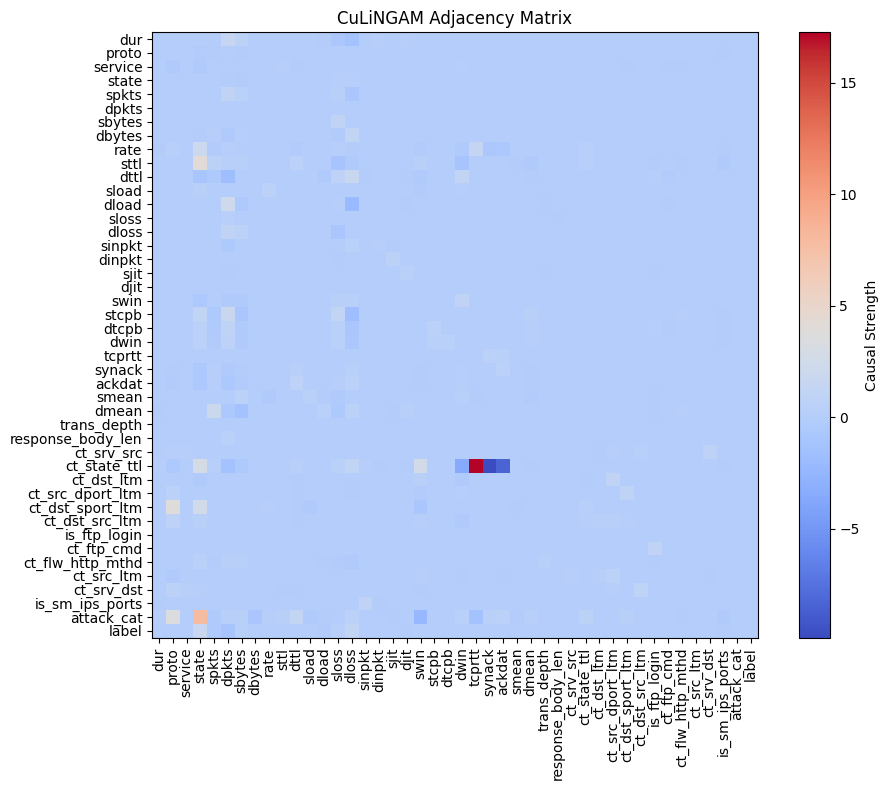

In [ ]:
import lingam
from culingam.directlingam import DirectLiNGAM as CuLiNGAM
from lingam.utils import make_dot
import matplotlib.pyplot as plt

# ==== 1. Initialize CuLiNGAM ====
model = CuLiNGAM(
    random_state=42,
    measure='pwling',          # Pairwise LiNGAM measure
    prior_knowledge=prior_knowledge  # Optional: matrix with constraints
)

# ==== 2. Fit the model ====
model.fit(df)

# ==== 3. Results ====
print("Causal ordering:", model.causal_order_)
print("\nAdjacency matrix:\n", model.adjacency_matrix_)

# ==== 4. Visualization ====
dot = make_dot(model.adjacency_matrix_, labels=list(df.columns))
dot.format = 'png'
dot.render("/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_graph_attack_cat", cleanup=True)
dot.view()

print("\nGraph saved as 'culingam_graph_attack_cat.png'")

# ==== 5. Plot adjacency heatmap ====
plt.figure(figsize=(10, 8))
plt.imshow(model.adjacency_matrix_, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Causal Strength')
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.title("CuLiNGAM Adjacency Matrix")
plt.tight_layout()
plt.show()

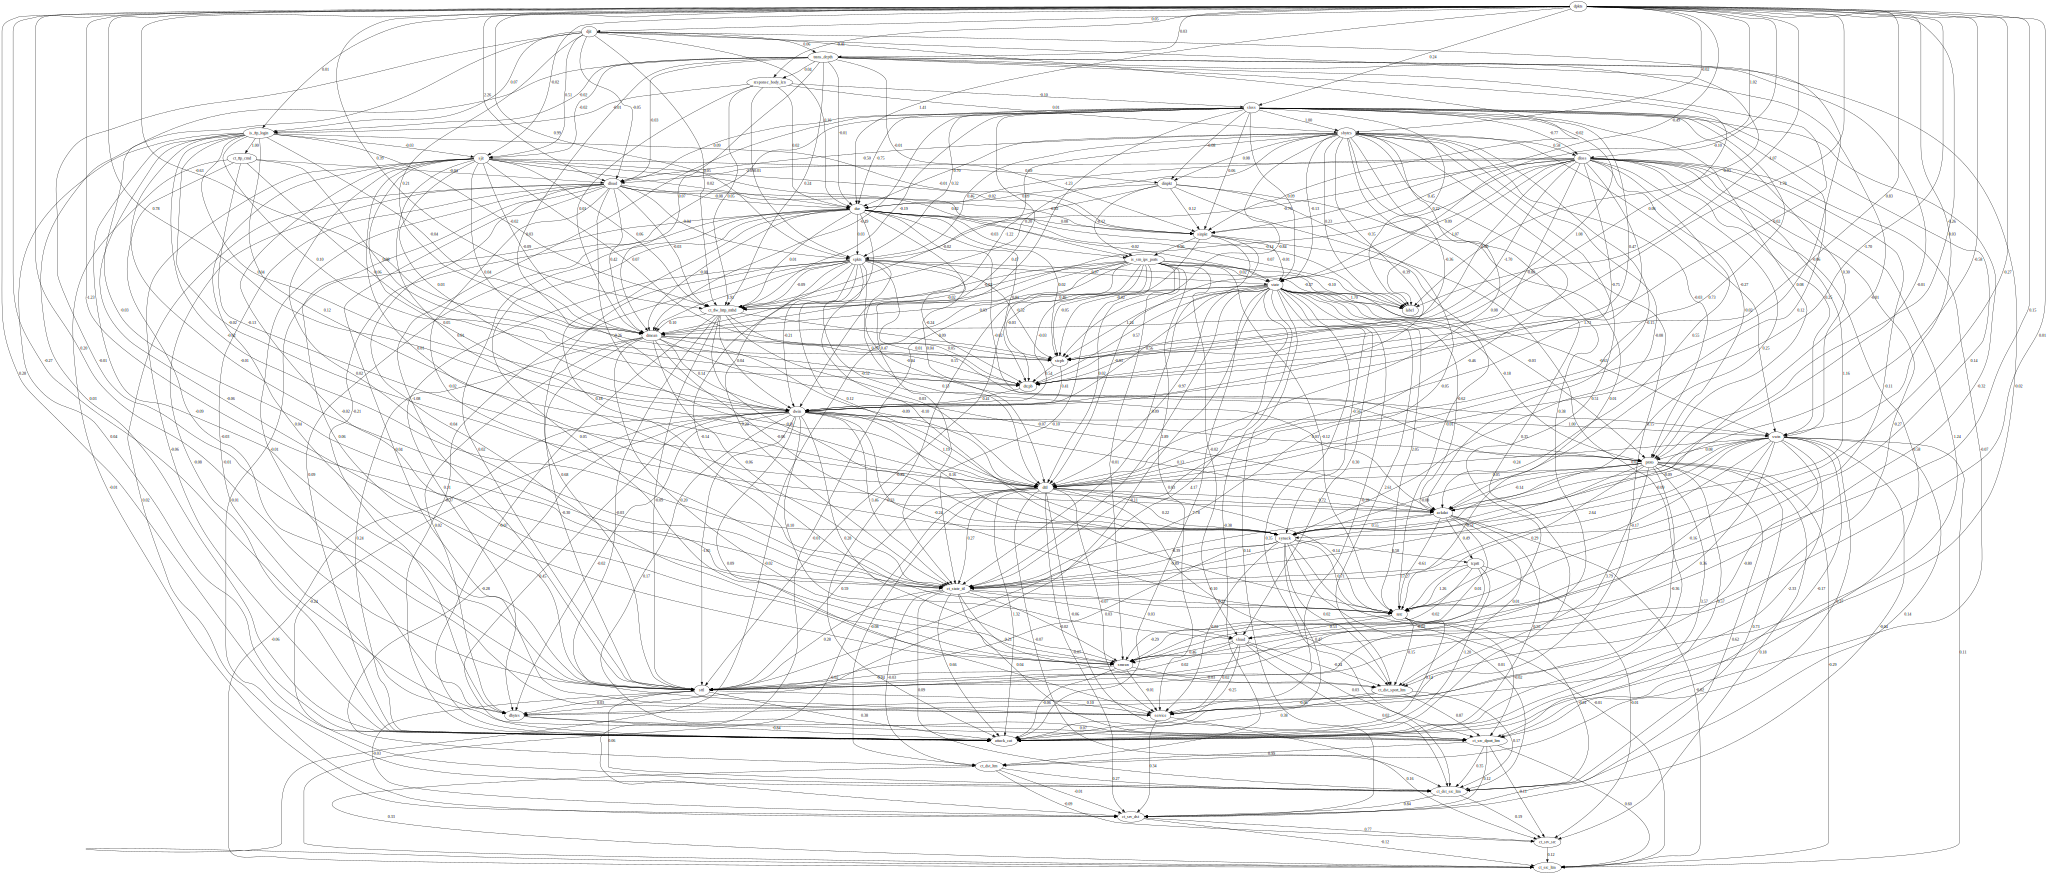

In [ ]:
make_dot(model.adjacency_matrix_, labels=list(df.columns))

#### saving adjaccency matrix

In [ ]:
import numpy as np
import pandas as pd

# Convert to DataFrame with column/row labels
adj_df = pd.DataFrame(
    model.adjacency_matrix_,
    index=df.columns,
    columns=df.columns
)

# Save to CSV
adj_df.to_csv("/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu_attack_cat.csv")

# Save as NumPy binary (faster for loading in Python later)
np.save("culingam_adjacency_matrix_attack_cat.npy", model.adjacency_matrix_)

print("\nAdjacency matrix saved as:")
print(" - culingam_adjacency_matrix.csv (human-readable)")
print(" - culingam_adjacency_matrix.npy (fast Python load)")


Adjacency matrix saved as:
 - culingam_adjacency_matrix.csv (human-readable)
 - culingam_adjacency_matrix.npy (fast Python load)


#### save order

In [ ]:
model.causal_order_

[np.int32(5),
 np.int32(18),
 np.int32(28),
 np.int32(29),
 np.int32(36),
 np.int32(37),
 np.int32(13),
 np.int32(6),
 np.int32(14),
 np.int32(12),
 np.int32(17),
 np.int32(16),
 np.int32(0),
 np.int32(15),
 np.int32(41),
 np.int32(4),
 np.int32(3),
 np.int32(43),
 np.int32(38),
 np.int32(27),
 np.int32(20),
 np.int32(21),
 np.int32(22),
 np.int32(19),
 np.int32(1),
 np.int32(10),
 np.int32(25),
 np.int32(24),
 np.int32(23),
 np.int32(31),
 np.int32(8),
 np.int32(11),
 np.int32(26),
 np.int32(9),
 np.int32(7),
 np.int32(34),
 np.int32(42),
 np.int32(33),
 np.int32(32),
 np.int32(35),
 np.int32(2),
 np.int32(40),
 np.int32(30),
 np.int32(39)]

#### subgraph

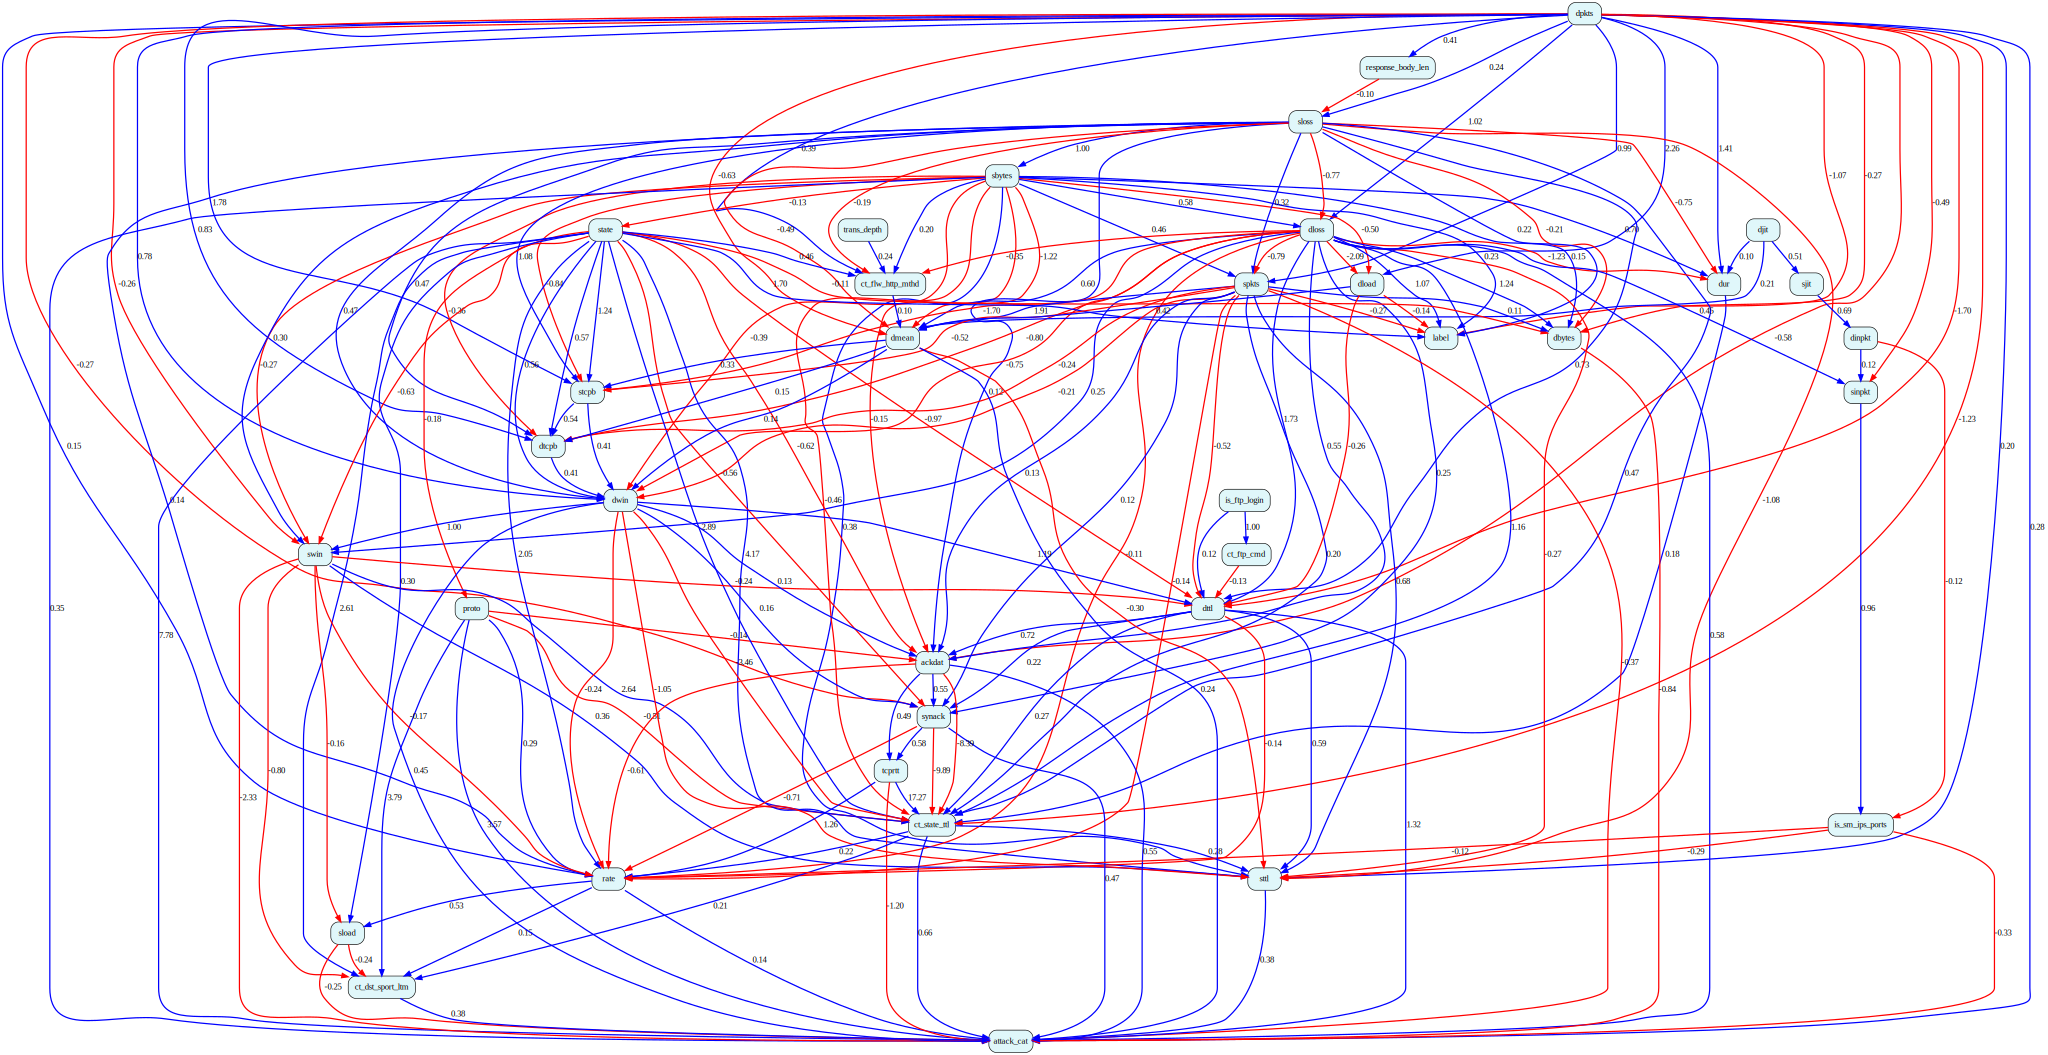

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import graphviz

def make_filtered_dot_graph(adjacency_matrix, labels, target_nodes, lower_limit=0.00000):
    """
    Creates a filtered causal graph, showing only the causal ancestors of target nodes.

    Args:
        adjacency_matrix (np.ndarray): The adjacency matrix from a LiNGAM model.
        labels (list): A list of column names corresponding to the matrix.
        target_nodes (list): A list of column names to serve as the target for filtering.
        lower_limit (float, optional): Edges with an absolute weight below this limit are pruned. Defaults to 0.0.

    Returns:
        graphviz.Digraph: A Graphviz object representing the filtered graph.
    """
    # Create a NetworkX directed graph from the adjacency matrix
    G = nx.DiGraph()
    for i, col_i in enumerate(labels):
        G.add_node(col_i)
        for j, col_j in enumerate(labels):
            weight = adjacency_matrix[i, j]
            # Add an edge if the weight is above the specified lower limit
            if abs(weight) > lower_limit:
                G.add_edge(col_j, col_i, weight=weight) # Note: LiNGAM matrix is B_ij for i<-j

    # Find all ancestors (causal parents) of the target nodes
    ancestors = set()
    for node in target_nodes:
        if node in G:
            ancestors.update(nx.ancestors(G, node))
            ancestors.add(node) # Include the target node itself

    # Create a new subgraph containing only the target nodes and their ancestors
    subgraph = G.subgraph(ancestors)

    # Create the Graphviz visualization
    dot = graphviz.Digraph(comment='Filtered Causal Graph', engine='dot')
    dot.attr('node', shape='box', style='rounded,filled', fillcolor='#E0F7FA')
    dot.attr('edge', color='black', arrowhead='normal')

    for node in subgraph.nodes():
        dot.node(node, node)

    for u, v, data in subgraph.edges(data=True):
        weight = data['weight']
        color = 'red' if weight < 0 else 'blue'
        label = f"{weight:.2f}"
        dot.edge(u, v, label=label, color=color, penwidth='2')

    return dot

# --- Example Usage with Dummy Data ---
# Let's assume you have an adjacency matrix and labels from your LiNGAM model.
# NOTE: Replace this section with your actual model output.

# Dummy data for demonstration purposes
labels = df.columns.tolist()
adj_matrix = model.adjacency_matrix_

# Use the function to draw the filtered graph
target_nodes = ['label', 'attack_cat']
LOWER_LIMIT = 0.1
filtered_graph = make_filtered_dot_graph(adj_matrix, labels, target_nodes, lower_limit=LOWER_LIMIT)

# To display the graph in a Jupyter Notebook, just run this line:
filtered_graph.render(f"/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_filtered_graph_attack_cat{LOWER_LIMIT}", format='png', cleanup=True)
filtered_graph


In [ ]:
# Assuming 'model' is your LiNGAM model and 'df' is your DataFrame
causal_effects_matrix = model.adjacency_matrix_
feature_names = list(df.columns)

target_index = feature_names.index('attack_cat')
causal_effects_on_target = causal_effects_matrix[target_index]

# Use a pandas Series to combine the values with the feature names
causal_effects_series = pd.Series(causal_effects_on_target, index=feature_names)

print("Direct Causal Effects on attack_cat:")
print(causal_effects_series.sort_values())

Direct Causal Effects on attack_cat:
swin                -2.329473
tcprtt              -1.200431
dbytes              -0.837965
spkts               -0.366205
is_sm_ips_ports     -0.330582
sload               -0.249382
dload               -0.078367
ct_flw_http_mthd    -0.071478
smean               -0.064501
sjit                -0.058463
djit                 0.000000
response_body_len    0.000000
sinpkt               0.000000
sloss                0.000000
stcpb                0.000000
dtcpb                0.000000
ct_src_dport_ltm     0.000000
ct_srv_dst           0.000000
ct_ftp_cmd           0.000000
ct_src_ltm           0.000000
ct_dst_ltm           0.000000
ct_dst_src_ltm       0.000000
label                0.000000
attack_cat           0.000000
service              0.000000
ct_srv_src           0.000000
dinpkt               0.015472
trans_depth          0.033513
is_ftp_login         0.040711
dur                  0.094756
rate                 0.139014
dmean                0.243948
dpk

In [ ]:
# Assuming 'model' is your LiNGAM model and 'df' is your DataFrame
causal_effects_matrix = model.adjacency_matrix_
feature_names = list(df.columns)

target_index = feature_names.index('label')
causal_effects_on_target = causal_effects_matrix[target_index]

# Use a pandas Series to combine the values with the feature names
causal_effects_series = pd.Series(causal_effects_on_target, index=feature_names)

print("Direct Causal Effects on label:")
print(causal_effects_series.sort_values())

Direct Causal Effects on label:
dpkts               -1.070584
spkts               -0.267513
dload               -0.140187
is_sm_ips_ports     -0.097971
djit                -0.034973
trans_depth         -0.009477
dinpkt              -0.008815
ct_ftp_cmd          -0.005982
response_body_len   -0.004327
sinpkt               0.000000
sload                0.000000
stcpb                0.000000
dbytes               0.000000
dttl                 0.000000
sttl                 0.000000
proto                0.000000
tcprtt               0.000000
dwin                 0.000000
synack               0.000000
ackdat               0.000000
dmean                0.000000
dtcpb                0.000000
sjit                 0.000000
swin                 0.000000
ct_srv_src           0.000000
smean                0.000000
ct_state_ttl         0.000000
ct_dst_src_ltm       0.000000
ct_dst_ltm           0.000000
ct_dst_sport_ltm     0.000000
rate                 0.000000
service              0.000000
ct_src_l

### bootstrapping

What bootstrap Does
The purpose of the bootstrap method is not to analyze the relationship between your features and the label or attack_cat columns. Instead, it assesses the statistical reliability of the causal relationships it finds among the features themselves.

Here’s a breakdown of the process:

Resampling: The method creates n_sampling (in your case, 200) new datasets by randomly sampling with replacement from your original df_f DataFrame.

Repeated Fitting: It runs the DirectLiNGAM algorithm on each of these 200 new datasets.

Result Aggregation: It then aggregates the results, providing you with a measure of how often each causal link (e.g., bytes_in -> num_pkts_in) was found across all 200 runs. This helps you determine which causal links are strong and stable versus those that might be a fluke of your specific dataset.



In [ ]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [ ]:
result=model.bootstrap(df, n_sampling=200)

TypeError: resample() missing 1 required positional argument: 'y'

In [ ]:
# Assuming 'model' is your LiNGAM model instance and 'df' is your full DataFrame.

# 1. Separate the features from the labels
df_f = df.drop(columns=['label', 'attack_cat'])

# 2. Run the bootstrap method on the features-only DataFrame
# This will resample the feature data to evaluate the stability of your causal graph
result = model.bootstrap(df_f, n_sampling=200)

print(result)

TypeError: resample() missing 1 required positional argument: 'y'

#### passing the model to cpu bc there is an error in gpu as can be seen in the previous code blocks

In [ ]:
import numpy as np
import pandas as pd
adj = pd.read_csv("/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu.csv", index_col=0).to_numpy()
adj

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.01837763,  0.        ,  0.        , ..., -0.02755696,
         0.        ,  0.        ],
       [-0.00811519, -0.41277224,  0.        , ...,  0.03329768,
         0.        ,  0.        ],
       ...,
       [-0.0295086 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00251812,  0.31803454,  0.        , ...,  0.02728017,
         0.        ,  0.        ],
       [ 0.06678489,  0.        ,  0.        , ..., -0.09797068,
         0.        ,  0.        ]])

In [ ]:
import numpy as np
import pandas as pd
from lingam import DirectLiNGAM

# Step 1: Simulate the results from your culingam model
# NOTE: Replace these with the actual results from your culingam model.
# The adjacency matrix (B) and the causal order are the two key outputs.
# The rows and columns of the matrix correspond to the causal order.
# The (i, j) element of B represents the causal effect from variable j to variable i.
feature_cols = df.columns
#culingam_adjacency_matrix = model.adjacency_matrix_
culingam_adjacency_matrix = pd.read_csv("/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu.csv", index_col=0).to_numpy()

# The causal order is the ordering of variables determined by the model.
# This should be the index positions of the variables in your original features.
# For example, if 'feature_A' is at index 0, 'feature_B' at index 1, etc.
# The causal order tells us the order of variable discovery.
#culingam_causal_order = ['dpkts', 'djit', 'trans_depth', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'sloss', 'sbytes', 'dloss', 'dload', 'sjit', 'dinpkt', 'dur', 'sinpkt', 'is_sm_ips_ports', 'spkts', 'state', 'label', 'ct_flw_http_mthd', 'dmean', 'stcpb', 'dtcpb', 'dwin', 'swin', 'proto', 'dttl', 'ackdat', 'synack', 'tcprtt', 'ct_state_ttl', 'rate', 'sload', 'smean', 'sttl', 'dbytes', 'attack_cat', 'ct_dst_sport_ltm', 'service', 'ct_src_dport_ltm', 'ct_dst_ltm', 'ct_dst_src_ltm', 'ct_srv_dst', 'ct_srv_src', 'ct_src_ltm']
# The causal order is the ordering of variables determined by the model.
# This should be the index positions of the variables in your original features.
# The list of column names:
culingam_causal_order_names = ['dpkts', 'djit', 'trans_depth', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'sloss', 'sbytes', 'dloss', 'dload', 'sjit', 'dinpkt', 'dur', 'sinpkt', 'is_sm_ips_ports', 'spkts', 'state', 'label', 'ct_flw_http_mthd', 'dmean', 'stcpb', 'dtcpb', 'dwin', 'swin', 'proto', 'dttl', 'ackdat', 'synack', 'tcprtt', 'ct_state_ttl', 'rate', 'sload', 'smean', 'sttl', 'dbytes', 'attack_cat', 'ct_dst_sport_ltm', 'service', 'ct_src_dport_ltm', 'ct_dst_ltm', 'ct_dst_src_ltm', 'ct_srv_dst', 'ct_srv_src', 'ct_src_ltm']

# The crucial fix: Convert the list of names to a list of integer indices
culingam_causal_order_indices = [feature_cols.get_loc(col_name) for col_name in culingam_causal_order_names]

# ----------------------------------------------------
# Step 2: Create a standard lingam model instance and "load" the results
# Create a new, untrained instance of the DirectLiNGAM model
model_instance = DirectLiNGAM()

# Manually set the private attributes.
# This makes the model 'think' it has already been fitted.
# The public attributes (`.adjacency_matrix_` etc.) will be automatically updated.
model_instance._adjacency_matrix = culingam_adjacency_matrix
model_instance._causal_order = culingam_causal_order_indices

# ----------------------------------------------------
# Step 3: Verify and use the "loaded" model
# You can now access the results as if you had just run the fit() method.
print("Adjacency Matrix from Loaded Model:\n")
print(pd.DataFrame(model_instance.adjacency_matrix_,
                   index=feature_cols,
                   columns=feature_cols))
print("\nCausal Order from Loaded Model:\n")
print([feature_cols[i] for i in model_instance.causal_order_])

# You can now use other methods that rely on the fitted state,
# like estimating total effects.
# For this example, let's assume we need to calculate the total effect of A on E.
# For this method, you also need to provide the original data (X).
X = pd.DataFrame(np.random.rand(100, 44), columns=feature_cols).to_numpy()
total_effect = model_instance.estimate_total_effect(X, from_index=0, to_index=4)
print(f"\nEstimated total effect of 'feature_A' on 'feature_E': {total_effect:.4f}")


Adjacency Matrix from Loaded Model:

                        dur     proto   service     state     spkts     dpkts  \
dur                0.000000  0.000000  0.000000  0.000000  0.000000  1.412866   
proto             -0.018378  0.000000  0.000000 -0.182383 -0.044463  0.031174   
service           -0.008115 -0.412772  0.000000 -0.477883  0.059459  0.000000   
state             -0.020125  0.000000  0.000000  0.000000  0.065898 -0.096808   
spkts              0.030203  0.000000  0.000000  0.000000  0.000000  0.994967   
dpkts              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
sbytes             0.000000  0.000000  0.000000  0.000000  0.000000 -0.019785   
dbytes             0.000000  0.000000  0.000000 -0.109446  0.110746 -0.269733   
rate              -0.098912  0.290693  0.000000  2.052569 -0.141139  0.152630   
sttl               0.017695  0.000000  0.000000  4.169590  0.680819  0.202559   
dttl               0.038703  0.048545  0.000000 -0.969161 -0.524943 -1.7

In [ ]:
df_list = df.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

44
{'dur': 0, 'proto': 1, 'service': 2, 'state': 3, 'spkts': 4, 'dpkts': 5, 'sbytes': 6, 'dbytes': 7, 'rate': 8, 'sttl': 9, 'dttl': 10, 'sload': 11, 'dload': 12, 'sloss': 13, 'dloss': 14, 'sinpkt': 15, 'dinpkt': 16, 'sjit': 17, 'djit': 18, 'swin': 19, 'stcpb': 20, 'dtcpb': 21, 'dwin': 22, 'tcprtt': 23, 'synack': 24, 'ackdat': 25, 'smean': 26, 'dmean': 27, 'trans_depth': 28, 'response_body_len': 29, 'ct_srv_src': 30, 'ct_state_ttl': 31, 'ct_dst_ltm': 32, 'ct_src_dport_ltm': 33, 'ct_dst_sport_ltm': 34, 'ct_dst_src_ltm': 35, 'is_ftp_login': 36, 'ct_ftp_cmd': 37, 'ct_flw_http_mthd': 38, 'ct_src_ltm': 39, 'ct_srv_dst': 40, 'is_sm_ips_ports': 41, 'attack_cat': 42, 'label': 43}


In [ ]:
n_sampling = 2
result=model_instance.bootstrap(df,n_sampling=n_sampling)

#### saving the results

In [ ]:
print("\n--- Part 2: Saving the Results to CSV ---")
import os

output_dir = "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/bootstrap-results"

#
# Access the adjacency matrices and total effects from the result object
adj_matrices = result.adjacency_matrices
total_effects = result.total_effects

# Flatten the 3D arrays to 2D DataFrames for easy saving to CSV
n_features = adj_matrices.shape[1]
adj_matrices_df = pd.DataFrame(adj_matrices.reshape(n_sampling, -1))
total_effects_df = pd.DataFrame(total_effects.reshape(n_sampling, -1))

# Save the DataFrames to CSV files
adj_matrices_df.to_csv(os.path.join(output_dir, 'bootstrap_adjacency_matrices.csv'), index=False)
total_effects_df.to_csv(os.path.join(output_dir, 'bootstrap_total_effects.csv'), index=False)

print(f"Saved bootstrap results to the '{output_dir}' directory.")

#### loading the results

In [ ]:
print("\n--- Part 3: Loading Results and Recreating Object ---")
output_dir = "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/bootstrap-results"
from lingam.utils import BootstrapResult

# Load the flattened CSV files back into DataFrames
try:
    loaded_adj_df = pd.read_csv(os.path.join(output_dir, 'bootstrap_adjacency_matrices.csv'))
    loaded_te_df = pd.read_csv(os.path.join(output_dir, 'bootstrap_total_effects.csv'))
except FileNotFoundError:
    print("Error: The CSV files were not found. Exiting.")
    exit()

# Get the number of samples and features from the loaded data
n_sampling_loaded = loaded_adj_df.shape[0]
n_features_loaded = int(np.sqrt(loaded_adj_df.shape[1]))

# Reshape the flattened DataFrames back to 3D NumPy arrays
loaded_adj_matrices = loaded_adj_df.to_numpy().reshape(n_sampling_loaded, n_features_loaded, n_features_loaded)
loaded_total_effects = loaded_te_df.to_numpy().reshape(n_sampling_loaded, n_features_loaded, n_features_loaded)

# Create a new BootstrapResult object with the loaded data
recreated_result = BootstrapResult(adjacency_matrices=loaded_adj_matrices,
                                   total_effects=loaded_total_effects)

print("Successfully loaded the results and recreated the BootstrapResult object.")


#### get causal directions

In [ ]:
from lingam.utils import make_dot, make_prior_knowledge,print_causal_directions, print_dagc

cdc = result.get_causal_direction_counts(n_directions=44, min_causal_effect=0.01, split_by_causal_effect_sign=True)

In [ ]:
print_causal_directions(cdc, 5)

#### possible Directed Acyclic Graphs: top3

In [ ]:
dagc = result.get_directed_acyclic_graph_counts(n_dags=3, min_causal_effect=0.01, split_by_causal_effect_sign=True)

#### print probabilities

In [ ]:
prob = result.get_probabilities(min_causal_effect=0.01)
print(prob)

#### get total effects

In [ ]:
causal_effects = result.get_total_causal_effects(min_causal_effect=0.01)

# Assign to pandas.DataFrame for pretty display
df1 = pd.DataFrame(causal_effects)
labels = [f'x{i}' for i in range(df.shape[1])]
df1['from'] = df1['from'].apply(lambda x : labels[x])
df1['to'] = df1['to'].apply(lambda x : labels[x])
df1.head(10)

In [ ]:
df1.sort_values('effect', ascending=False).head(10)

### checking effects on label

In [ ]:
df_list = df.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

In [ ]:
df1[df1['to']=='x43'].sort_values('effect', ascending=False).plot.bar(x='from',y='effect');

In [ ]:
from_index = 0 # index of x0
to_index = 15 # index of x3

pd.DataFrame(result.get_paths(from_index, to_index)).sort_values('effect', ascending=False).head(10).plot.bar(y='effect',x='path');

# causal discovery with categorical variables as one hot encoding

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/data/UNSW_NB15_all_ohe.csv')
df.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms
0,-0.188346,-0.101342,-0.129612,-0.047849,-0.097232,-0.568650,0.702512,1.500906,-0.380090,-0.269328,...,False,False,False,False,False,False,True,False,False,False
1,-0.099897,-0.042496,0.173998,-0.045110,0.188966,-0.568623,-1.151363,1.483170,-0.380121,-0.064104,...,False,False,False,False,False,False,True,False,False,False
2,0.063006,-0.086630,-0.022456,-0.047239,-0.008217,-0.569024,-1.151363,1.483170,-0.380158,-0.247593,...,False,False,False,False,False,False,True,False,False,False
3,0.072800,-0.057207,-0.058174,-0.045720,-0.093142,-0.569027,-1.151363,1.483170,-0.380152,-0.271458,...,False,False,False,False,False,False,True,False,False,False
4,-0.133449,-0.071919,-0.111753,-0.046261,-0.096576,-0.568904,0.722026,1.483170,-0.380121,-0.271197,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
df.columns

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload',
       ...
       'attack_cat_Analysis', 'attack_cat_Backdoor', 'attack_cat_DoS',
       'attack_cat_Exploits', 'attack_cat_Fuzzers', 'attack_cat_Generic',
       'attack_cat_Normal', 'attack_cat_Reconnaissance',
       'attack_cat_Shellcode', 'attack_cat_Worms'],
      dtype='object', length=207)

In [ ]:
!pip install lingam

### index mappings

In [ ]:
df_list = df.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

207
{'dur': 0, 'spkts': 1, 'dpkts': 2, 'sbytes': 3, 'dbytes': 4, 'rate': 5, 'sttl': 6, 'dttl': 7, 'sload': 8, 'dload': 9, 'sloss': 10, 'dloss': 11, 'sinpkt': 12, 'dinpkt': 13, 'sjit': 14, 'djit': 15, 'swin': 16, 'stcpb': 17, 'dtcpb': 18, 'dwin': 19, 'tcprtt': 20, 'synack': 21, 'ackdat': 22, 'smean': 23, 'dmean': 24, 'trans_depth': 25, 'response_body_len': 26, 'ct_srv_src': 27, 'ct_state_ttl': 28, 'ct_dst_ltm': 29, 'ct_src_dport_ltm': 30, 'ct_dst_sport_ltm': 31, 'ct_dst_src_ltm': 32, 'is_ftp_login': 33, 'ct_ftp_cmd': 34, 'ct_flw_http_mthd': 35, 'ct_src_ltm': 36, 'ct_srv_dst': 37, 'is_sm_ips_ports': 38, 'label': 39, 'proto_3pc': 40, 'proto_a/n': 41, 'proto_aes-sp3-d': 42, 'proto_any': 43, 'proto_argus': 44, 'proto_aris': 45, 'proto_arp': 46, 'proto_ax.25': 47, 'proto_bbn-rcc': 48, 'proto_bna': 49, 'proto_br-sat-mon': 50, 'proto_cbt': 51, 'proto_cftp': 52, 'proto_chaos': 53, 'proto_compaq-peer': 54, 'proto_cphb': 55, 'proto_cpnx': 56, 'proto_crtp': 57, 'proto_crudp': 58, 'proto_dcn': 59, 

### setting prior knowledge

In [ ]:
features = ['attack_cat_Analysis', 'attack_cat_Backdoor', 'attack_cat_DoS', 'attack_cat_Exploits', 'attack_cat_Fuzzers', 'attack_cat_Generic', 'attack_cat_Normal', 'attack_cat_Reconnaissance', 'attack_cat_Shellcode', 'attack_cat_Worms']

for feature in features:
    print(f'df_dict["{feature}"]')

df_dict["attack_cat_Analysis"]
df_dict["attack_cat_Backdoor"]
df_dict["attack_cat_DoS"]
df_dict["attack_cat_Exploits"]
df_dict["attack_cat_Fuzzers"]
df_dict["attack_cat_Generic"]
df_dict["attack_cat_Normal"]
df_dict["attack_cat_Reconnaissance"]
df_dict["attack_cat_Shellcode"]
df_dict["attack_cat_Worms"]


In [ ]:
from lingam.utils import make_prior_knowledge

prior_knowledge = make_prior_knowledge(
    207,
    sink_variables = [df_dict["label"], df_dict["attack_cat_Analysis"],
df_dict["attack_cat_Backdoor"],
df_dict["attack_cat_DoS"],
df_dict["attack_cat_Exploits"],
df_dict["attack_cat_Fuzzers"],
df_dict["attack_cat_Generic"],
df_dict["attack_cat_Normal"],
df_dict["attack_cat_Reconnaissance"],
df_dict["attack_cat_Shellcode"],
df_dict["attack_cat_Worms"]],
)


### direct lingam

In [ ]:
import lingam
from lingam import DirectLiNGAM
from lingam.utils import make_dot

model = DirectLiNGAM(
                    random_state=42,
                    measure = 'pwling',
                    prior_knowledge = prior_knowledge
                    )

model.fit(df)
print("Causal ordering:", model.causal_order_)

KeyboardInterrupt: 

#### gpu

In [ ]:
!pip -q install cupy-cuda12x  # pick the right CUDA build for your runtime
!pip -q install git+https://github.com/aknvictor/culingam.git
!pip -q install joblib tqdm

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import lingam
from culingam.directlingam import DirectLiNGAM as CuLiNGAM
from lingam.utils import make_dot
import matplotlib.pyplot as plt

# Ensure all columns are float64
df = df.astype(float)

print("\n===== Final Data Types =====")
print(df.dtypes.value_counts())

# ==== 1. Initialize CuLiNGAM ====
model = CuLiNGAM(
    random_state=42,
    measure='pwling',          # Pairwise LiNGAM measure
    prior_knowledge=prior_knowledge  # Optional: matrix with constraints
)

# ==== 2. Fit the model ====
model.fit(df)

# ==== 3. Results ====
print("Causal ordering:", model.causal_order_)
print("\nAdjacency matrix:\n", model.adjacency_matrix_)

# ==== 4. Visualization ====
dot = make_dot(model.adjacency_matrix_, labels=list(df.columns))
dot.format = 'png'
dot.render("/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_graph_ohe", cleanup=True)
dot.view()

print("\nGraph saved as 'culingam_graph_ohe.png'")

# ==== 5. Plot adjacency heatmap ====
plt.figure(figsize=(10, 8))
plt.imshow(model.adjacency_matrix_, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Causal Strength')
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.title("CuLiNGAM Adjacency Matrix")
plt.tight_layout()
plt.show()


===== Final Data Types =====
float64    207
Name: count, dtype: int64


  5%|▌         | 11/207 [08:05<2:20:49, 43.11s/it]

In [ ]:
print("Causal ordering:", model.causal_order_)
print("\nAdjacency matrix:\n", model.adjacency_matrix_)

Causal ordering: [np.int32(2), np.int32(15), np.int32(25), np.int32(26), np.int32(77), np.int32(131), np.int32(178), np.int32(179), np.int32(181), np.int32(186), np.int32(187), np.int32(189), np.int32(192), np.int32(195), np.int32(196), np.int32(73), np.int32(174), np.int32(82), np.int32(206), np.int32(170), np.int32(129), np.int32(138), np.int32(105), np.int32(183), np.int32(57), np.int32(124), np.int32(115), np.int32(66), np.int32(106), np.int32(132), np.int32(130), np.int32(75), np.int32(140), np.int32(171), np.int32(142), np.int32(128), np.int32(165), np.int32(144), np.int32(62), np.int32(41), np.int32(156), np.int32(90), np.int32(166), np.int32(70), np.int32(98), np.int32(121), np.int32(163), np.int32(136), np.int32(94), np.int32(40), np.int32(50), np.int32(150), np.int32(95), np.int32(59), np.int32(172), np.int32(42), np.int32(85), np.int32(168), np.int32(93), np.int32(139), np.int32(103), np.int32(147), np.int32(107), np.int32(88), np.int32(96), np.int32(141), np.int32(125), np.

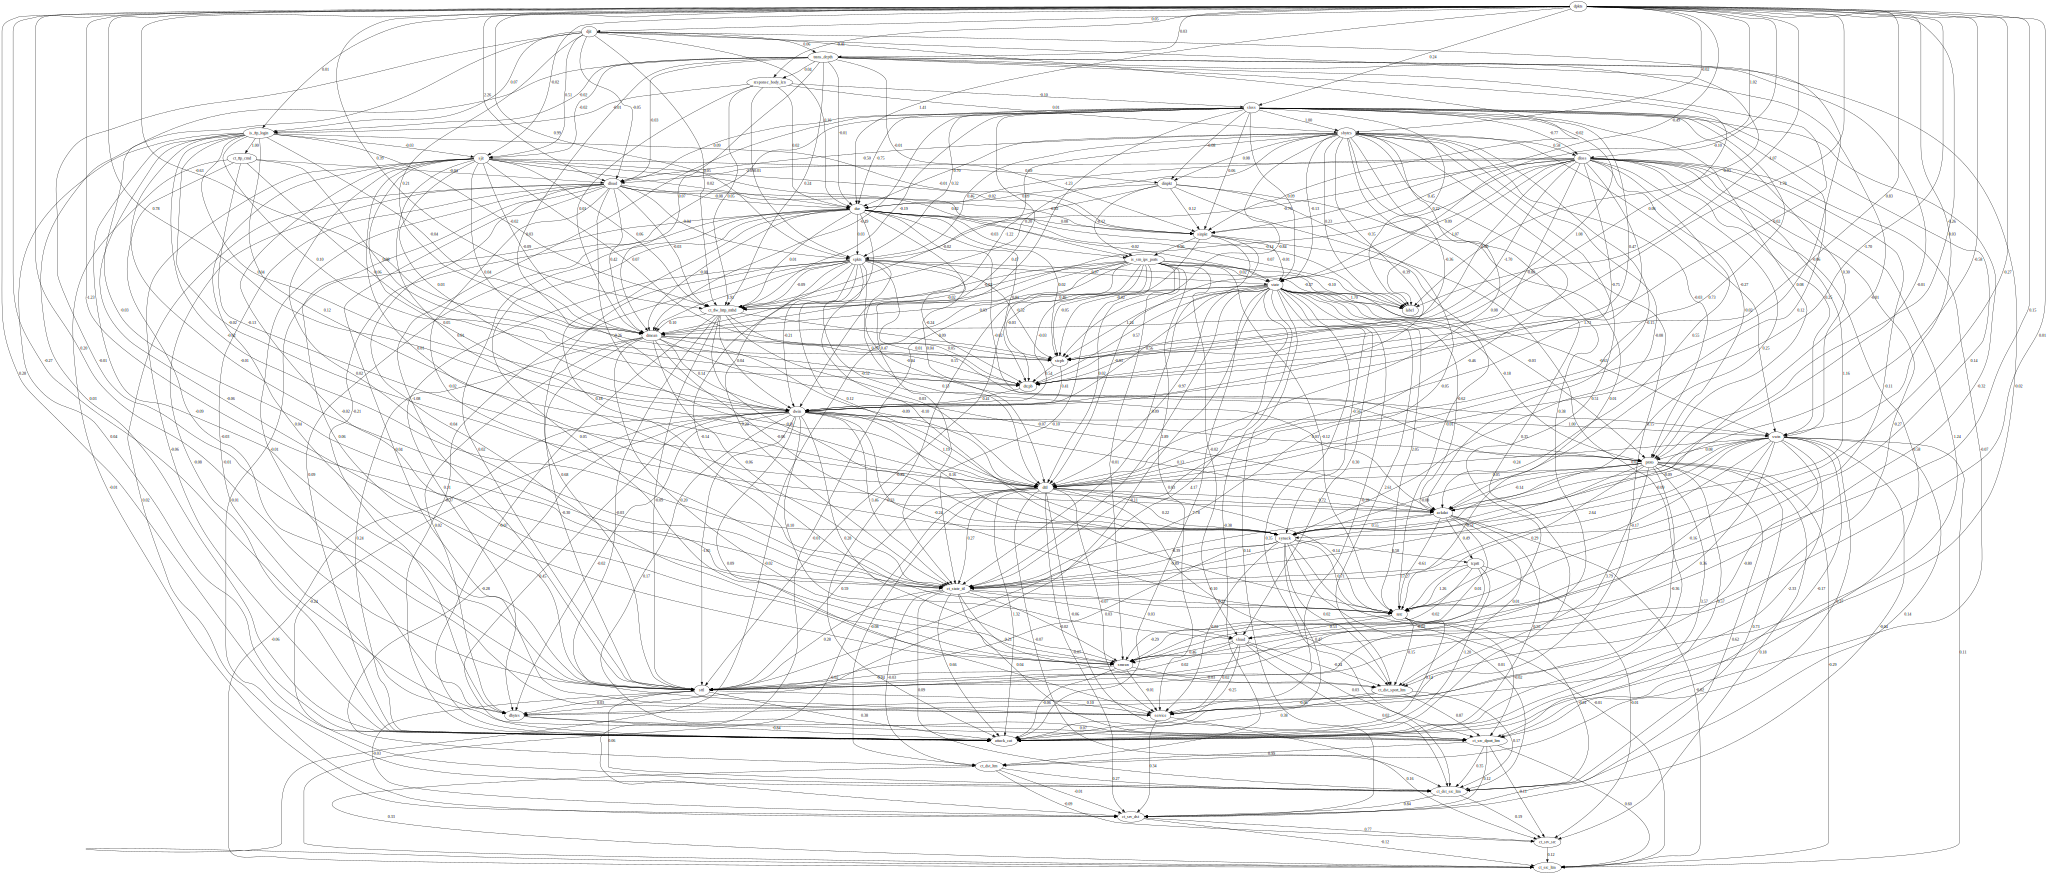

In [ ]:
make_dot(model.adjacency_matrix_, labels=list(df.columns))

#### saving adjaccency matrix

In [ ]:
import numpy as np
import pandas as pd

# Convert to DataFrame with column/row labels
adj_df = pd.DataFrame(
    model.adjacency_matrix_,
    index=df.columns,
    columns=df.columns
)

# Save to CSV
adj_df.to_csv("/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu_ohe.csv")

# Save as NumPy binary (faster for loading in Python later)
np.save("culingam_adjacency_matrix_attack_cat.npy", model.adjacency_matrix_)

print("\nAdjacency matrix saved as:")
print(" - culingam_adjacency_matrix.csv (human-readable)")
print(" - culingam_adjacency_matrix.npy (fast Python load)")

#### save order

In [ ]:
model.causal_order_

[np.int32(5),
 np.int32(18),
 np.int32(28),
 np.int32(29),
 np.int32(36),
 np.int32(37),
 np.int32(13),
 np.int32(6),
 np.int32(14),
 np.int32(12),
 np.int32(17),
 np.int32(16),
 np.int32(0),
 np.int32(15),
 np.int32(41),
 np.int32(4),
 np.int32(3),
 np.int32(43),
 np.int32(38),
 np.int32(27),
 np.int32(20),
 np.int32(21),
 np.int32(22),
 np.int32(19),
 np.int32(1),
 np.int32(10),
 np.int32(25),
 np.int32(24),
 np.int32(23),
 np.int32(31),
 np.int32(8),
 np.int32(11),
 np.int32(26),
 np.int32(9),
 np.int32(7),
 np.int32(34),
 np.int32(42),
 np.int32(33),
 np.int32(32),
 np.int32(35),
 np.int32(2),
 np.int32(40),
 np.int32(30),
 np.int32(39)]

#### subgraph

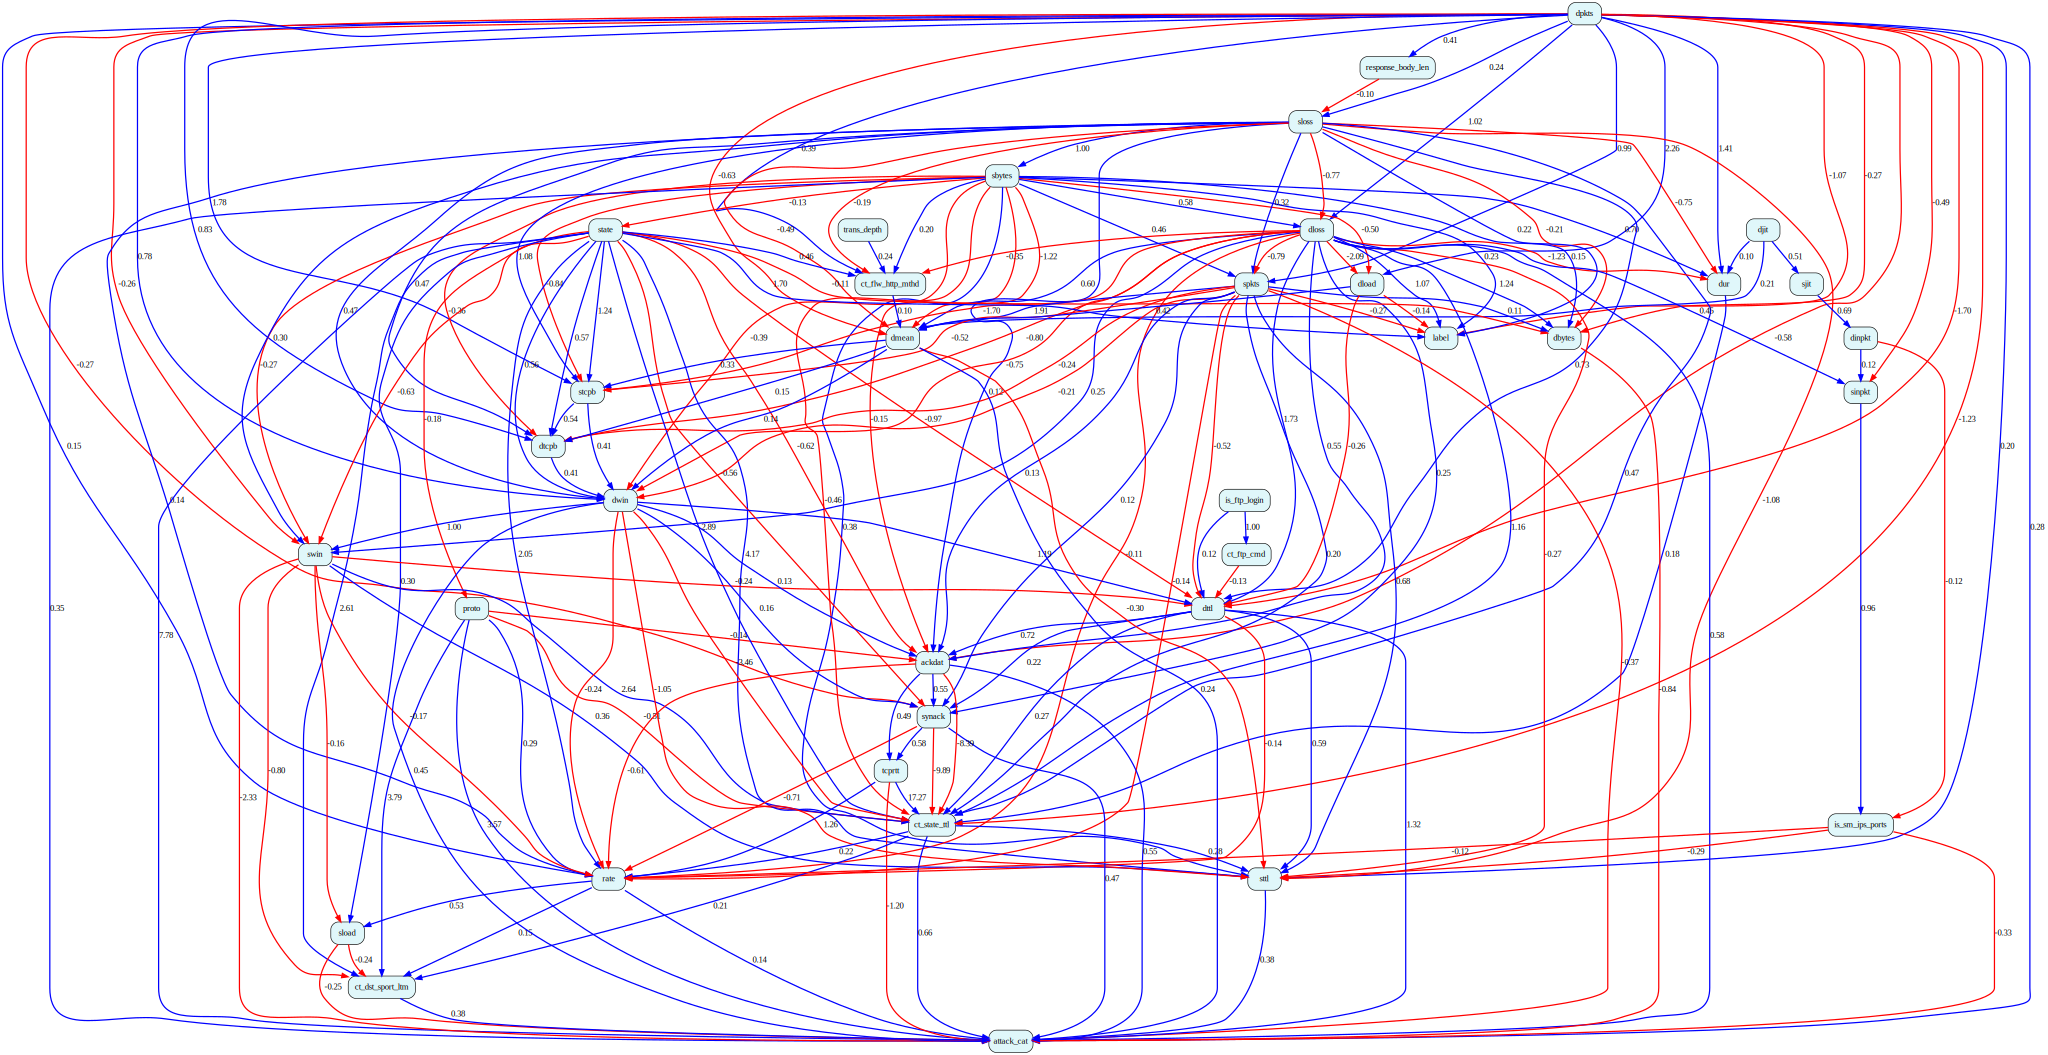

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import graphviz

def make_filtered_dot_graph(adjacency_matrix, labels, target_nodes, lower_limit=0.00000):
    """
    Creates a filtered causal graph, showing only the causal ancestors of target nodes.

    Args:
        adjacency_matrix (np.ndarray): The adjacency matrix from a LiNGAM model.
        labels (list): A list of column names corresponding to the matrix.
        target_nodes (list): A list of column names to serve as the target for filtering.
        lower_limit (float, optional): Edges with an absolute weight below this limit are pruned. Defaults to 0.0.

    Returns:
        graphviz.Digraph: A Graphviz object representing the filtered graph.
    """
    # Create a NetworkX directed graph from the adjacency matrix
    G = nx.DiGraph()
    for i, col_i in enumerate(labels):
        G.add_node(col_i)
        for j, col_j in enumerate(labels):
            weight = adjacency_matrix[i, j]
            # Add an edge if the weight is above the specified lower limit
            if abs(weight) > lower_limit:
                G.add_edge(col_j, col_i, weight=weight) # Note: LiNGAM matrix is B_ij for i<-j

    # Find all ancestors (causal parents) of the target nodes
    ancestors = set()
    for node in target_nodes:
        if node in G:
            ancestors.update(nx.ancestors(G, node))
            ancestors.add(node) # Include the target node itself

    # Create a new subgraph containing only the target nodes and their ancestors
    subgraph = G.subgraph(ancestors)

    # Create the Graphviz visualization
    dot = graphviz.Digraph(comment='Filtered Causal Graph', engine='dot')
    dot.attr('node', shape='box', style='rounded,filled', fillcolor='#E0F7FA')
    dot.attr('edge', color='black', arrowhead='normal')

    for node in subgraph.nodes():
        dot.node(node, node)

    for u, v, data in subgraph.edges(data=True):
        weight = data['weight']
        color = 'red' if weight < 0 else 'blue'
        label = f"{weight:.2f}"
        dot.edge(u, v, label=label, color=color, penwidth='2')

    return dot

# --- Example Usage with Dummy Data ---
# Let's assume you have an adjacency matrix and labels from your LiNGAM model.
# NOTE: Replace this section with your actual model output.

# Dummy data for demonstration purposes
labels = df.columns.tolist()
adj_matrix = model.adjacency_matrix_

# Use the function to draw the filtered graph
target_nodes = ['label', 'attack_cat']
LOWER_LIMIT = 0.2
filtered_graph = make_filtered_dot_graph(adj_matrix, labels, target_nodes, lower_limit=LOWER_LIMIT)

# To display the graph in a Jupyter Notebook, just run this line:
filtered_graph.render(f"/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_filtered_graph_ohe{LOWER_LIMIT}", format='png', cleanup=True)
filtered_graph


In [ ]:
# Assuming 'model' is your LiNGAM model and 'df' is your DataFrame
causal_effects_matrix = model.adjacency_matrix_
feature_names = list(df.columns)

target_index = feature_names.index('attack_cat')
causal_effects_on_target = causal_effects_matrix[target_index]

# Use a pandas Series to combine the values with the feature names
causal_effects_series = pd.Series(causal_effects_on_target, index=feature_names)

print("Direct Causal Effects on attack_cat:")
print(causal_effects_series.sort_values())

Direct Causal Effects on attack_cat:
swin                -2.329473
tcprtt              -1.200431
dbytes              -0.837965
spkts               -0.366205
is_sm_ips_ports     -0.330582
sload               -0.249382
dload               -0.078367
ct_flw_http_mthd    -0.071478
smean               -0.064501
sjit                -0.058463
djit                 0.000000
response_body_len    0.000000
sinpkt               0.000000
sloss                0.000000
stcpb                0.000000
dtcpb                0.000000
ct_src_dport_ltm     0.000000
ct_srv_dst           0.000000
ct_ftp_cmd           0.000000
ct_src_ltm           0.000000
ct_dst_ltm           0.000000
ct_dst_src_ltm       0.000000
label                0.000000
attack_cat           0.000000
service              0.000000
ct_srv_src           0.000000
dinpkt               0.015472
trans_depth          0.033513
is_ftp_login         0.040711
dur                  0.094756
rate                 0.139014
dmean                0.243948
dpk

In [ ]:
# Assuming 'model' is your LiNGAM model and 'df' is your DataFrame
causal_effects_matrix = model.adjacency_matrix_
feature_names = list(df.columns)

target_index = feature_names.index('label')
causal_effects_on_target = causal_effects_matrix[target_index]

# Use a pandas Series to combine the values with the feature names
causal_effects_series = pd.Series(causal_effects_on_target, index=feature_names)

print("Direct Causal Effects on label:")
print(causal_effects_series.sort_values())

Direct Causal Effects on label:
dpkts               -1.070584
spkts               -0.267513
dload               -0.140187
is_sm_ips_ports     -0.097971
djit                -0.034973
trans_depth         -0.009477
dinpkt              -0.008815
ct_ftp_cmd          -0.005982
response_body_len   -0.004327
sinpkt               0.000000
sload                0.000000
stcpb                0.000000
dbytes               0.000000
dttl                 0.000000
sttl                 0.000000
proto                0.000000
tcprtt               0.000000
dwin                 0.000000
synack               0.000000
ackdat               0.000000
dmean                0.000000
dtcpb                0.000000
sjit                 0.000000
swin                 0.000000
ct_srv_src           0.000000
smean                0.000000
ct_state_ttl         0.000000
ct_dst_src_ltm       0.000000
ct_dst_ltm           0.000000
ct_dst_sport_ltm     0.000000
rate                 0.000000
service              0.000000
ct_src_l

### bootstrapping

What bootstrap Does
The purpose of the bootstrap method is not to analyze the relationship between your features and the label or attack_cat columns. Instead, it assesses the statistical reliability of the causal relationships it finds among the features themselves.

Here’s a breakdown of the process:

Resampling: The method creates n_sampling (in your case, 200) new datasets by randomly sampling with replacement from your original df_f DataFrame.

Repeated Fitting: It runs the DirectLiNGAM algorithm on each of these 200 new datasets.

Result Aggregation: It then aggregates the results, providing you with a measure of how often each causal link (e.g., bytes_in -> num_pkts_in) was found across all 200 runs. This helps you determine which causal links are strong and stable versus those that might be a fluke of your specific dataset.



In [ ]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [ ]:
result=model.bootstrap(df, n_sampling=200)

TypeError: resample() missing 1 required positional argument: 'y'

In [ ]:
# Assuming 'model' is your LiNGAM model instance and 'df' is your full DataFrame.

# 1. Separate the features from the labels
df_f = df.drop(columns=['label', 'attack_cat'])

# 2. Run the bootstrap method on the features-only DataFrame
# This will resample the feature data to evaluate the stability of your causal graph
result = model.bootstrap(df_f, n_sampling=200)

print(result)

TypeError: resample() missing 1 required positional argument: 'y'

#### passing the model to cpu bc there is an error in gpu as can be seen in the previous code blocks

In [ ]:
import numpy as np
import pandas as pd
adj = pd.read_csv("/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu.csv", index_col=0).to_numpy()
adj

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.01837763,  0.        ,  0.        , ..., -0.02755696,
         0.        ,  0.        ],
       [-0.00811519, -0.41277224,  0.        , ...,  0.03329768,
         0.        ,  0.        ],
       ...,
       [-0.0295086 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00251812,  0.31803454,  0.        , ...,  0.02728017,
         0.        ,  0.        ],
       [ 0.06678489,  0.        ,  0.        , ..., -0.09797068,
         0.        ,  0.        ]])

In [ ]:
import numpy as np
import pandas as pd
from lingam import DirectLiNGAM

# Step 1: Simulate the results from your culingam model
# NOTE: Replace these with the actual results from your culingam model.
# The adjacency matrix (B) and the causal order are the two key outputs.
# The rows and columns of the matrix correspond to the causal order.
# The (i, j) element of B represents the causal effect from variable j to variable i.
feature_cols = df.columns
#culingam_adjacency_matrix = model.adjacency_matrix_
culingam_adjacency_matrix = pd.read_csv("/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu.csv", index_col=0).to_numpy()

# The causal order is the ordering of variables determined by the model.
# This should be the index positions of the variables in your original features.
# For example, if 'feature_A' is at index 0, 'feature_B' at index 1, etc.
# The causal order tells us the order of variable discovery.
#culingam_causal_order = ['dpkts', 'djit', 'trans_depth', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'sloss', 'sbytes', 'dloss', 'dload', 'sjit', 'dinpkt', 'dur', 'sinpkt', 'is_sm_ips_ports', 'spkts', 'state', 'label', 'ct_flw_http_mthd', 'dmean', 'stcpb', 'dtcpb', 'dwin', 'swin', 'proto', 'dttl', 'ackdat', 'synack', 'tcprtt', 'ct_state_ttl', 'rate', 'sload', 'smean', 'sttl', 'dbytes', 'attack_cat', 'ct_dst_sport_ltm', 'service', 'ct_src_dport_ltm', 'ct_dst_ltm', 'ct_dst_src_ltm', 'ct_srv_dst', 'ct_srv_src', 'ct_src_ltm']
# The causal order is the ordering of variables determined by the model.
# This should be the index positions of the variables in your original features.
# The list of column names:
culingam_causal_order_names = ['dpkts', 'djit', 'trans_depth', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'sloss', 'sbytes', 'dloss', 'dload', 'sjit', 'dinpkt', 'dur', 'sinpkt', 'is_sm_ips_ports', 'spkts', 'state', 'label', 'ct_flw_http_mthd', 'dmean', 'stcpb', 'dtcpb', 'dwin', 'swin', 'proto', 'dttl', 'ackdat', 'synack', 'tcprtt', 'ct_state_ttl', 'rate', 'sload', 'smean', 'sttl', 'dbytes', 'attack_cat', 'ct_dst_sport_ltm', 'service', 'ct_src_dport_ltm', 'ct_dst_ltm', 'ct_dst_src_ltm', 'ct_srv_dst', 'ct_srv_src', 'ct_src_ltm']

# The crucial fix: Convert the list of names to a list of integer indices
culingam_causal_order_indices = [feature_cols.get_loc(col_name) for col_name in culingam_causal_order_names]

# ----------------------------------------------------
# Step 2: Create a standard lingam model instance and "load" the results
# Create a new, untrained instance of the DirectLiNGAM model
model_instance = DirectLiNGAM()

# Manually set the private attributes.
# This makes the model 'think' it has already been fitted.
# The public attributes (`.adjacency_matrix_` etc.) will be automatically updated.
model_instance._adjacency_matrix = culingam_adjacency_matrix
model_instance._causal_order = culingam_causal_order_indices

# ----------------------------------------------------
# Step 3: Verify and use the "loaded" model
# You can now access the results as if you had just run the fit() method.
print("Adjacency Matrix from Loaded Model:\n")
print(pd.DataFrame(model_instance.adjacency_matrix_,
                   index=feature_cols,
                   columns=feature_cols))
print("\nCausal Order from Loaded Model:\n")
print([feature_cols[i] for i in model_instance.causal_order_])

# You can now use other methods that rely on the fitted state,
# like estimating total effects.
# For this example, let's assume we need to calculate the total effect of A on E.
# For this method, you also need to provide the original data (X).
X = pd.DataFrame(np.random.rand(100, 44), columns=feature_cols).to_numpy()
total_effect = model_instance.estimate_total_effect(X, from_index=0, to_index=4)
print(f"\nEstimated total effect of 'feature_A' on 'feature_E': {total_effect:.4f}")


Adjacency Matrix from Loaded Model:

                        dur     proto   service     state     spkts     dpkts  \
dur                0.000000  0.000000  0.000000  0.000000  0.000000  1.412866   
proto             -0.018378  0.000000  0.000000 -0.182383 -0.044463  0.031174   
service           -0.008115 -0.412772  0.000000 -0.477883  0.059459  0.000000   
state             -0.020125  0.000000  0.000000  0.000000  0.065898 -0.096808   
spkts              0.030203  0.000000  0.000000  0.000000  0.000000  0.994967   
dpkts              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
sbytes             0.000000  0.000000  0.000000  0.000000  0.000000 -0.019785   
dbytes             0.000000  0.000000  0.000000 -0.109446  0.110746 -0.269733   
rate              -0.098912  0.290693  0.000000  2.052569 -0.141139  0.152630   
sttl               0.017695  0.000000  0.000000  4.169590  0.680819  0.202559   
dttl               0.038703  0.048545  0.000000 -0.969161 -0.524943 -1.7

In [ ]:
df_list = df.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

44
{'dur': 0, 'proto': 1, 'service': 2, 'state': 3, 'spkts': 4, 'dpkts': 5, 'sbytes': 6, 'dbytes': 7, 'rate': 8, 'sttl': 9, 'dttl': 10, 'sload': 11, 'dload': 12, 'sloss': 13, 'dloss': 14, 'sinpkt': 15, 'dinpkt': 16, 'sjit': 17, 'djit': 18, 'swin': 19, 'stcpb': 20, 'dtcpb': 21, 'dwin': 22, 'tcprtt': 23, 'synack': 24, 'ackdat': 25, 'smean': 26, 'dmean': 27, 'trans_depth': 28, 'response_body_len': 29, 'ct_srv_src': 30, 'ct_state_ttl': 31, 'ct_dst_ltm': 32, 'ct_src_dport_ltm': 33, 'ct_dst_sport_ltm': 34, 'ct_dst_src_ltm': 35, 'is_ftp_login': 36, 'ct_ftp_cmd': 37, 'ct_flw_http_mthd': 38, 'ct_src_ltm': 39, 'ct_srv_dst': 40, 'is_sm_ips_ports': 41, 'attack_cat': 42, 'label': 43}


In [ ]:
n_sampling = 2
result=model_instance.bootstrap(df,n_sampling=n_sampling)

#### saving the results

In [ ]:
print("\n--- Part 2: Saving the Results to CSV ---")
import os

output_dir = "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/bootstrap-results"

#
# Access the adjacency matrices and total effects from the result object
adj_matrices = result.adjacency_matrices
total_effects = result.total_effects

# Flatten the 3D arrays to 2D DataFrames for easy saving to CSV
n_features = adj_matrices.shape[1]
adj_matrices_df = pd.DataFrame(adj_matrices.reshape(n_sampling, -1))
total_effects_df = pd.DataFrame(total_effects.reshape(n_sampling, -1))

# Save the DataFrames to CSV files
adj_matrices_df.to_csv(os.path.join(output_dir, 'bootstrap_adjacency_matrices.csv'), index=False)
total_effects_df.to_csv(os.path.join(output_dir, 'bootstrap_total_effects.csv'), index=False)

print(f"Saved bootstrap results to the '{output_dir}' directory.")

#### loading the results

In [ ]:
print("\n--- Part 3: Loading Results and Recreating Object ---")
output_dir = "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/bootstrap-results"
from lingam.utils import BootstrapResult

# Load the flattened CSV files back into DataFrames
try:
    loaded_adj_df = pd.read_csv(os.path.join(output_dir, 'bootstrap_adjacency_matrices.csv'))
    loaded_te_df = pd.read_csv(os.path.join(output_dir, 'bootstrap_total_effects.csv'))
except FileNotFoundError:
    print("Error: The CSV files were not found. Exiting.")
    exit()

# Get the number of samples and features from the loaded data
n_sampling_loaded = loaded_adj_df.shape[0]
n_features_loaded = int(np.sqrt(loaded_adj_df.shape[1]))

# Reshape the flattened DataFrames back to 3D NumPy arrays
loaded_adj_matrices = loaded_adj_df.to_numpy().reshape(n_sampling_loaded, n_features_loaded, n_features_loaded)
loaded_total_effects = loaded_te_df.to_numpy().reshape(n_sampling_loaded, n_features_loaded, n_features_loaded)

# Create a new BootstrapResult object with the loaded data
recreated_result = BootstrapResult(adjacency_matrices=loaded_adj_matrices,
                                   total_effects=loaded_total_effects)

print("Successfully loaded the results and recreated the BootstrapResult object.")


#### get causal directions

In [ ]:
from lingam.utils import make_dot, make_prior_knowledge,print_causal_directions, print_dagc

cdc = result.get_causal_direction_counts(n_directions=44, min_causal_effect=0.01, split_by_causal_effect_sign=True)

In [ ]:
print_causal_directions(cdc, 5)

#### possible Directed Acyclic Graphs: top3

In [ ]:
dagc = result.get_directed_acyclic_graph_counts(n_dags=3, min_causal_effect=0.01, split_by_causal_effect_sign=True)

#### print probabilities

In [ ]:
prob = result.get_probabilities(min_causal_effect=0.01)
print(prob)

#### get total effects

In [ ]:
causal_effects = result.get_total_causal_effects(min_causal_effect=0.01)

# Assign to pandas.DataFrame for pretty display
df1 = pd.DataFrame(causal_effects)
labels = [f'x{i}' for i in range(df.shape[1])]
df1['from'] = df1['from'].apply(lambda x : labels[x])
df1['to'] = df1['to'].apply(lambda x : labels[x])
df1.head(10)

In [ ]:
df1.sort_values('effect', ascending=False).head(10)

### checking effects on label

In [ ]:
df_list = df.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

In [ ]:
df1[df1['to']=='x43'].sort_values('effect', ascending=False).plot.bar(x='from',y='effect');

In [ ]:
from_index = 0 # index of x0
to_index = 15 # index of x3

pd.DataFrame(result.get_paths(from_index, to_index)).sort_values('effect', ascending=False).head(10).plot.bar(y='effect',x='path');